## FINAL PROJECT SUBMISSION

Please fill out:
* Student name: MERCY KIRAGU
* Student pace: FULLTIME-HYBRID
* Scheduled project review date/time:07/06/2024
* Instructor name: MARYANN MWIKALI
* Blog post URL:N/A


## CREDIT CARD FRAUD DETECTION SYSTEM FOR ZEST BANK

### 1. BUSINESS UNDERSTANDING

### a.)OVERVIEW

Zest Bank, like many financial institutions, faces the constant threat of fraudulent activities. These credit card fraudulent activities can result in significant financial losses and damage to the bank's reputation. To mitigate these risks, Zest Bank is seeking to implement a robust fraud detection system that can accurately identify and prevent fraudulent transactions in real-time.

### b.) PROBLEM STATEMENT
For many banks,retainng high profitable customers is the number one goal.Banking fraud,however poses a significant threat to this goal for differrent banks including Zest Bank .In terms of substantial financial losses ,trust and credibility ,this is a concerning issue to both Zest Bank and it's customers.

Zest Bank faces a significant challenge in detecting and preventing fraudulent transactions within its extensive financial network. Conventional rule-based systems have proven insufficient against increasingly sophisticated fraud schemes, resulting in substantial financial losses and reputational harm. Therefore, there is an urgent need to develop and deploy an advanced fraud detection system capable of accurately identifying fraudulent activities in real-time, while minimizing false positives.

In this project I will create a system called SafeSwipe for detecting fraudulent credit card transactions with the help of classification machine learning models.




### c.) CHALLENGES

1. **Data Volume**: Handling the vast amount of data processed daily requires a model that responds quickly to detect fraud.

2. **Imbalanced Data**: With the majority of transactions being non-fraudulent, detecting the fraudulent ones becomes challenging.

3. **Data Privacy**: Accessing data, especially private information, poses a significant challenge.

4. **Misclassification**: Some fraudulent transactions go unnoticed, leading to misclassification.

5. **Adaptive Techniques by Scammers**: Scammers continually evolve their methods, posing a challenge to the effectiveness of fraud detection models. 
6. **Accuracy Metrics** :Accuracy alone may not be the most appropriate metric to evaluate the performance of the fraud detection model.






### d.) PROPOSED SOLUTIONS

**Solutions:**

1. **Simple and Fast Models**: Implementing models that are both simple and quick to identify anomalies and classify them as fraudulent transactions promptly.

2. **Imbalance Handling Methods**: Utilizing effective methods to address imbalance in the data,such as oversampling and undersampling methods ensuring accurate detection of fraudulent 
transactions.

3. **Privacy-preserving Techniques**: Reducing data dimensionality to protect user privacy while maintaining the model's effectiveness.

4. **Trustworthy Data Sources**: Using reliable data sources that verify and double-check the information, particularly during model training, to enhance accuracy.

5. **Interpretable Models**: Developing models that are simple and interpretable allows for swift adaptation to new scamming techniques with minimal adjustments, ensuring continuous deployment of effective fraud detection systems.

6. **use other metrics** :to use metrics such as precision, recall, and F1-score, along with accuracy, to evaluate the performance of a fraud detection model

### e.) OBJECTIVES

1. **Developing an Efficient Model**: Create various classification machine learning models and settling on the best performing model capable of accurately identifying fraudulent credit card transactions while minimizing false positives.

2. **Handling Imbalanced Data**: Implement techniques to address the class imbalance in the dataset, ensuring that the model can effectively learn from the limited number of fraudulent transactions.

3. **Real-time Detection**: Build a system that can process transactions in real-time, providing immediate alerts for potentially fraudulent activity to prevent financial losses.

4. **Privacy Preservation**: Incorporate privacy-preserving techniques to protect sensitive customer information while still allowing for effective fraud detection.

5. **Performance Evaluation**: Conduct thorough evaluation and validation of the model's performance using appropriate metrics, such as precision, recall, F1-score, to assess its effectiveness in real-world scenarios.


6. **Scalability**: Design the system to handle large volumes of transactions efficiently, ensuring scalability to accommodate growth in transaction volume over time.

7. **Normalization**: Apply normalization techniques to preprocess the data and standardize features, ensuring that the model's performance is not affected by variations in the scale of input features.

8. **Hyperparameter Tuning**: Explore and optimize the hyperparameters of the machine learning model to enhance its performance further. Utilize techniques such as grid search, random search to systematically search the hyperparameter space and identify the configuration that maximizes the model's effectiveness in fraud detection while minimizing computational resources and training time. Conduct cross-validation to validate the chosen hyperparameters and ensure robustness of the model across different subsets of the data.


## 2.) DATA UNDERSTANDING
### a.)DATA SOURCE
The dataset for this project was sourced from Kaggle, a platform for data science datasets.Specifically, the dataset  I used is the credit card fraud detection dataset.


The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.The dataset consists of 31 columns/features and 284,807 rows

It contains only numerical input variables which are the result of a PCA transformation.Due to confidentiality issues original features and more background information about the data wasn't provided. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which were not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

### IMPORTING THE NECESSARY LIBRARIES

In [238]:

# importing the necessary dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import f1_score, classification_report
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.utils import resample
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier









from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from xgboost import XGBClassifier











import warnings
warnings.filterwarnings("ignore")



### LOADING THE DATA

In [73]:
#loading the data
df = pd.read_csv('creditcard.csv')


In [74]:
#code for displaying all the columns
pd.options.display.max_columns = None

In [75]:
#CHECKING THE FIRST FIVE ROWS
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [76]:
#CHECKING THE LAST FIVE ROWS
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


## 3.)EXPLORATORY DATA ANALYSIS

In [77]:
#CHECKING THE ROWS AND COLUMNS
df.shape

(284807, 31)

In [78]:
#CHECKING ALL THE COLUMN NAMES
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [79]:
#CHECKING THE STATSTICAL SUMMARY OF THE FEATURES
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,1.673327e-15,-1.247012e-15,8.190001e-16,1.207294e-15,4.887456e-15,1.437716e-15,-3.772171e-16,9.564149e-16,1.039917e-15,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [80]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [81]:
#CHECKING THE DATATYPES AND NON/NULL DISTRIBUTION
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

##### **Handling missing values**

In [82]:
#CHECKING IF THERE ARE ANY MISSING VALUES
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

##### **observation**

There are no features with missing values.

##### **Dealing with duplicates.**

In [83]:
df.duplicated().any()

True

In [104]:
df.duplicated().sum()

8063

##### **Observation**

There are 1081 rows with  duplicate values which we are going to drop.

In [85]:
#DROP THE DUPLICATED ROWS
# Identify duplicated rows
duplicated_rows = df.duplicated()

# Invert the boolean mask to keep non-duplicated rows
df = df[~duplicated_rows]

In [86]:
df.duplicated().any()

False

Our dataset now has no duplicates.

##### **Dealing with Outliers.**

As the whole dataset is transformed with PCA, so assuming that the outliers are already treated. Hence not performing any outliers treatment on the dataframe.

##### **Observing the distribution of our classes**

In [87]:
#CHECKING THE CLASS DISTRIBUTION OF THE TARGET VARIABLE
df['Class'].value_counts()

Class
0    283253
1       473
Name: count, dtype: int64

In [88]:
# CREATING NEW VARIABLES 'no_fraud' and 'fraud'
no_fraud = df['Class'] == 0
fraud = df['Class'] == 1


In [89]:
#CHECKING THE CLASS DISTRIBUTION OF THE TARGET VARIABLE IN PERCENTAGE
print('No Frauds', round(df['Class'].value_counts()[0] / len(df) *100,2), '%of the dataset')
print('Frauds', round(df['Class'].value_counts()[1] / len(df) *100,2), '%of the dataset')



No Frauds 99.83 %of the dataset
Frauds 0.17 %of the dataset


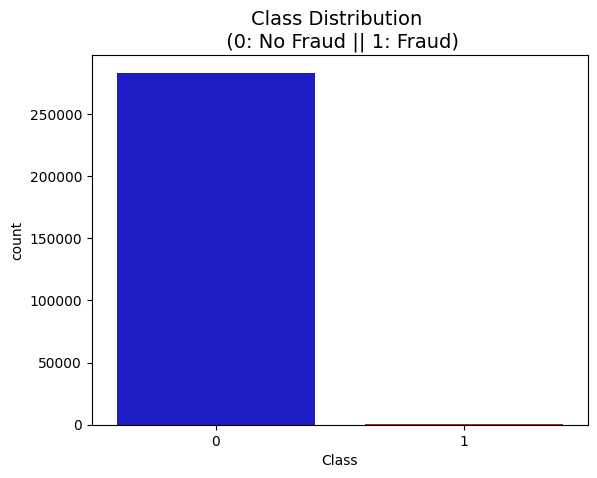

In [90]:
#CREATING A BAR CHART FOR THE CLASS DISTRIBUTION OF FRAUDULENT VS NON FRAUDULENT TRANSACTIONS

# Suppress FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

colors = ["#0101DF", "#DF0101"]
sns.countplot(x='Class', data=df, palette=colors)
plt.title('Class Distribution \n (0: No Fraud || 1: Fraud)', fontsize=14)
plt.show()


**Observation.**

The dataset exhibits a significant class imbalance, with non-fraudulent transactions representing approximately 99.83% of the data and fraudulent transactions accounting for the remaining 0.17%. This imbalance can pose challenges in training accurate machine learning models, as algorithms may tend to favor the majority class and perform poorly on the minority class.

 **observing the distribution of classes with Amount.**

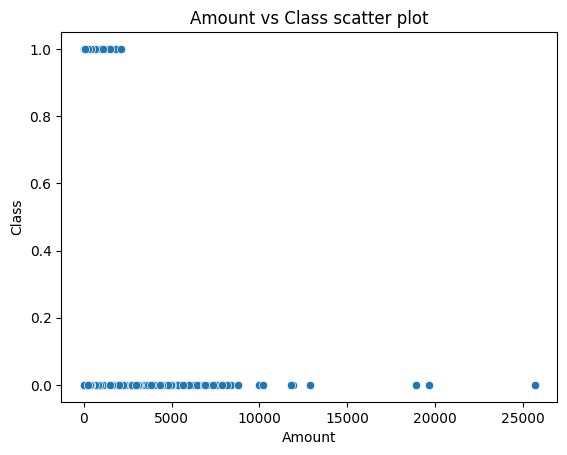

In [105]:
# Creating a scatter plot to observe the distribution of classes with Amount
sns.scatterplot(x=df["Amount"], y=df["Class"])
plt.title("Amount vs Class scatter plot")
plt.show()

**Observation**

Clearly low amount transactions are more likely to be fraudulent than high amount transaction.

**Observing the distribution of classes with time.**

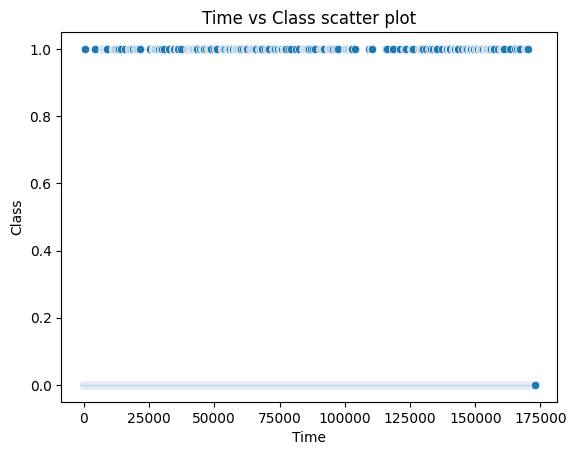

In [92]:
# Create a scatter plot to observe the distribution of classes with time
sns.scatterplot(x= df["Time"],y=df["Class"])
plt.title("Time vs Class scatter plot")
plt.show()

##### **Observation**

There is not much insight can be drwan from the distribution of the fraudulent transaction based on time as fraudulent/non-fraudulent both transaction are distributed over time.

Dropping Time column as this feature is not going to help in the model building.


In [93]:

# Drop unnecessary columns
df = df.drop("Time", axis = 1)

**Checking the distribution of the numerical features**

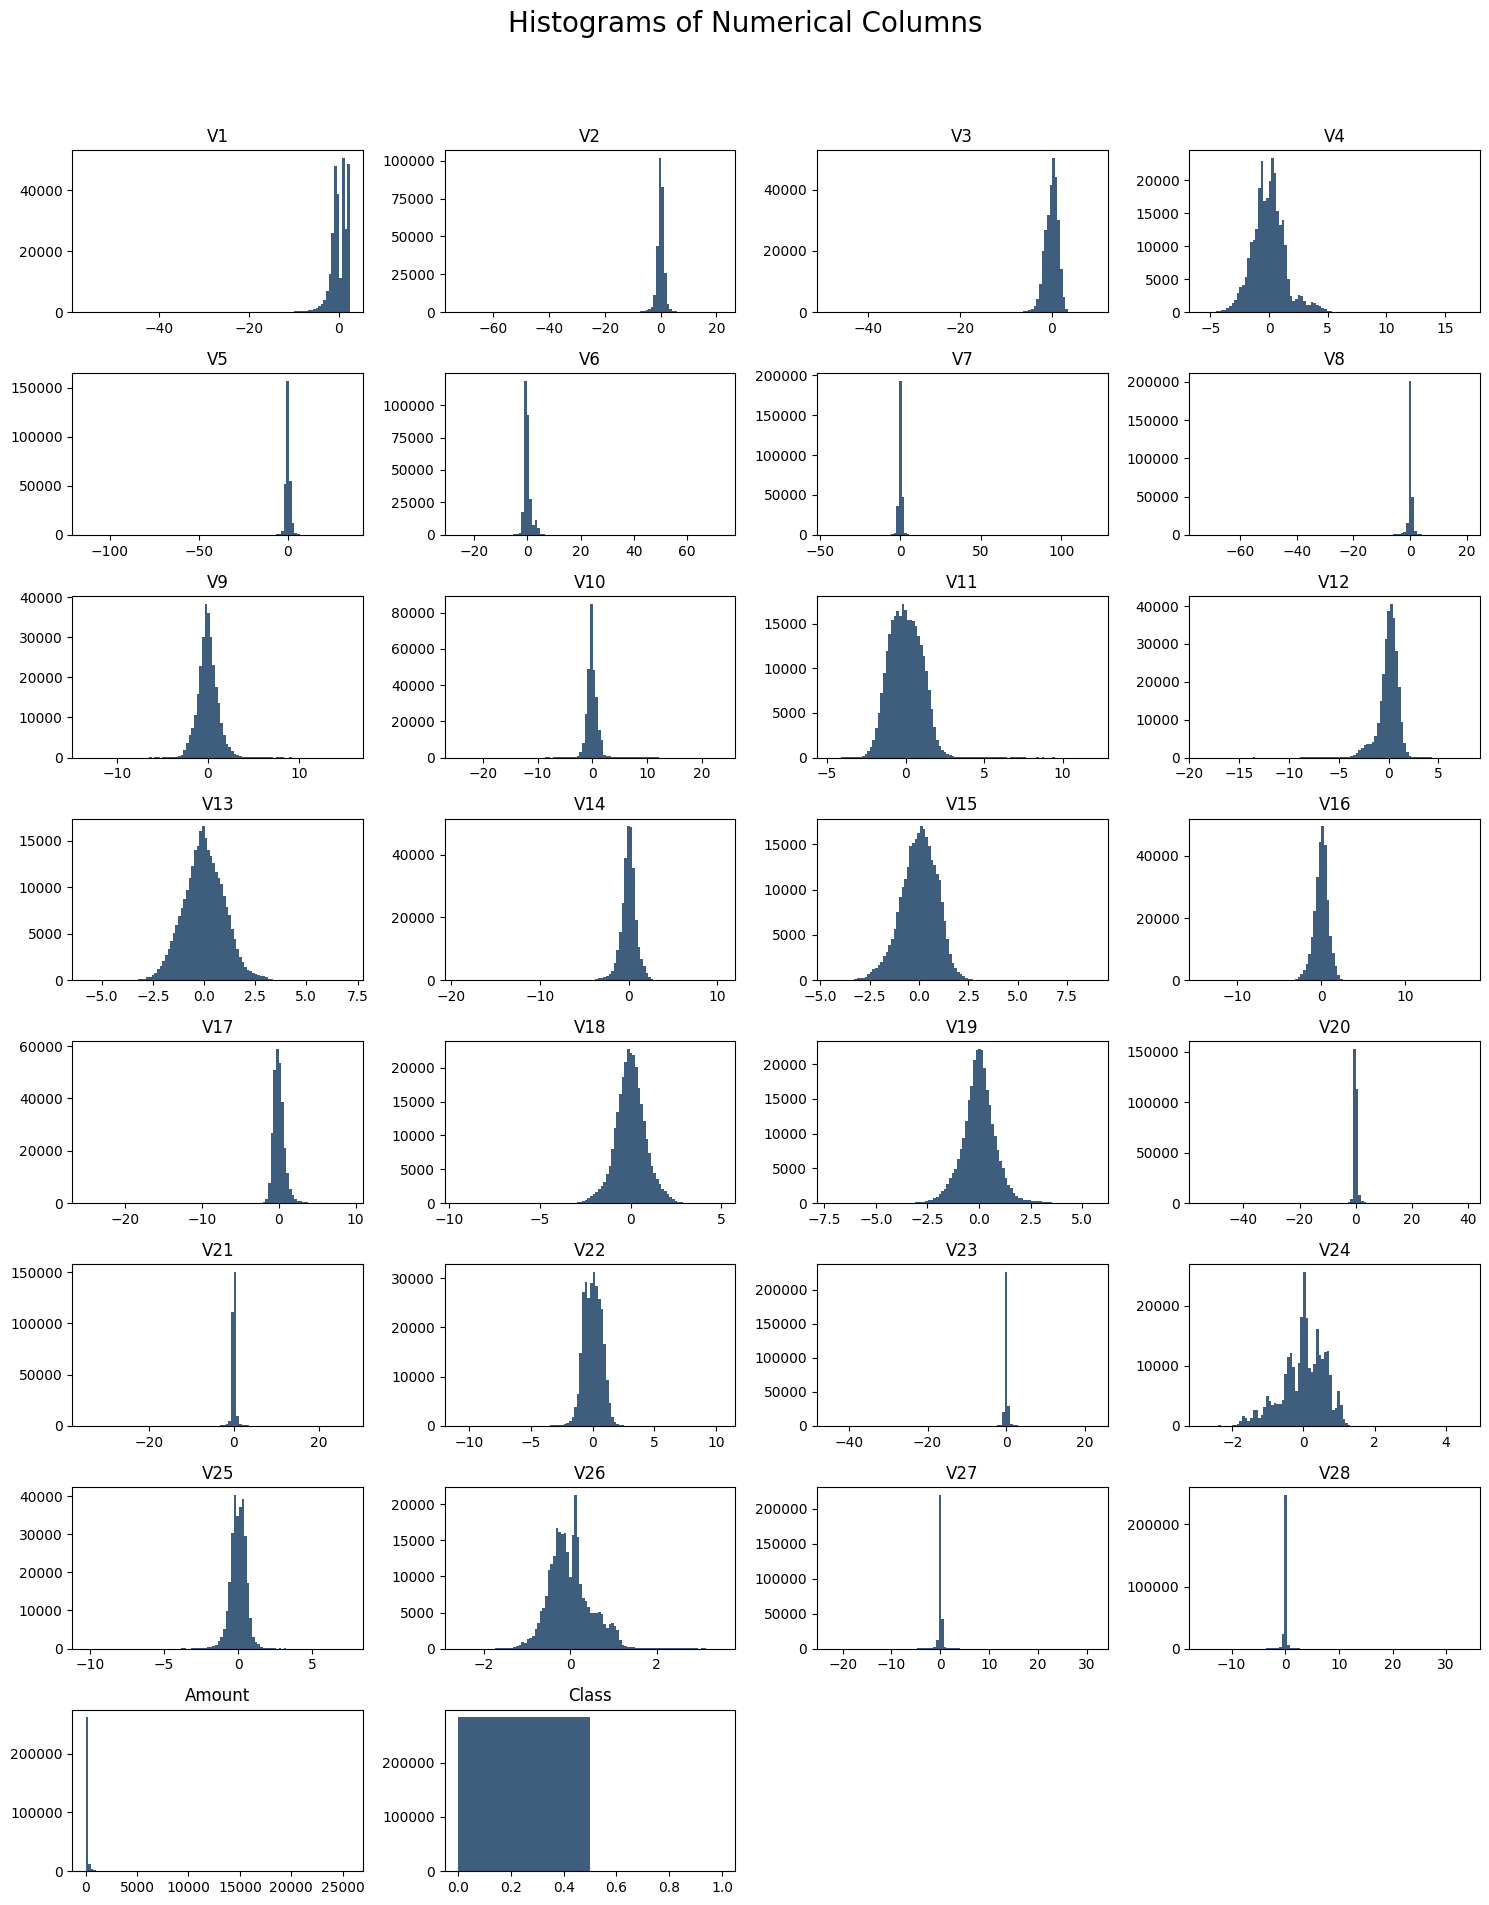

In [94]:
## Histograms to show the distribution of the numerical features.
fig = plt.figure(figsize=(15, 20))
plt.suptitle('Histograms of Numerical Columns', fontsize=20)
for i in range(df.shape[1]):
    plt.subplot(8, 4, i + 1)
    f = plt.gca()
    f.set_title(df.columns.values[i])

    vals = np.size(df.iloc[:, i].unique())
    if vals >= 100:
        vals = 100                                    # limit our bins to 100 maximum
    
    plt.hist(df.iloc[:, i], bins=vals, color='#3F5D7D')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

**Correlation check**

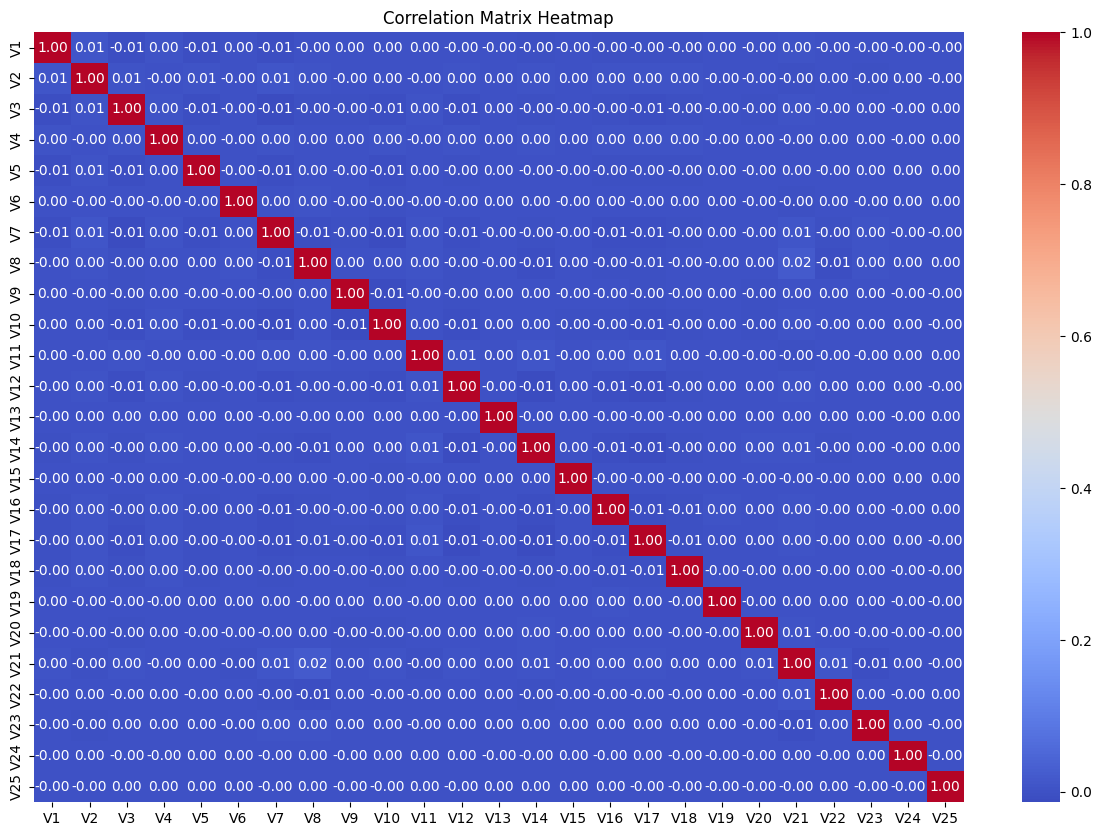

In [95]:
# VISUALIZING CORRELATION OF THE FEATURES
columns = ["V1", "V2", "V3", "V4", "V5", "V6", "V7", "V8", "V9", "V10", 
           "V11", "V12", "V13", "V14", "V15", "V16", "V17", "V18", "V19", 
           "V20", "V21", "V22", "V23", "V24", "V25"]

# Calculate the correlation matrix for the specified columns
cor_mat = df[columns].corr()

# Plot the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(cor_mat, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

**Obseravation**

Clearly there is little to no correlation between the features.

<Figure size 640x480 with 0 Axes>

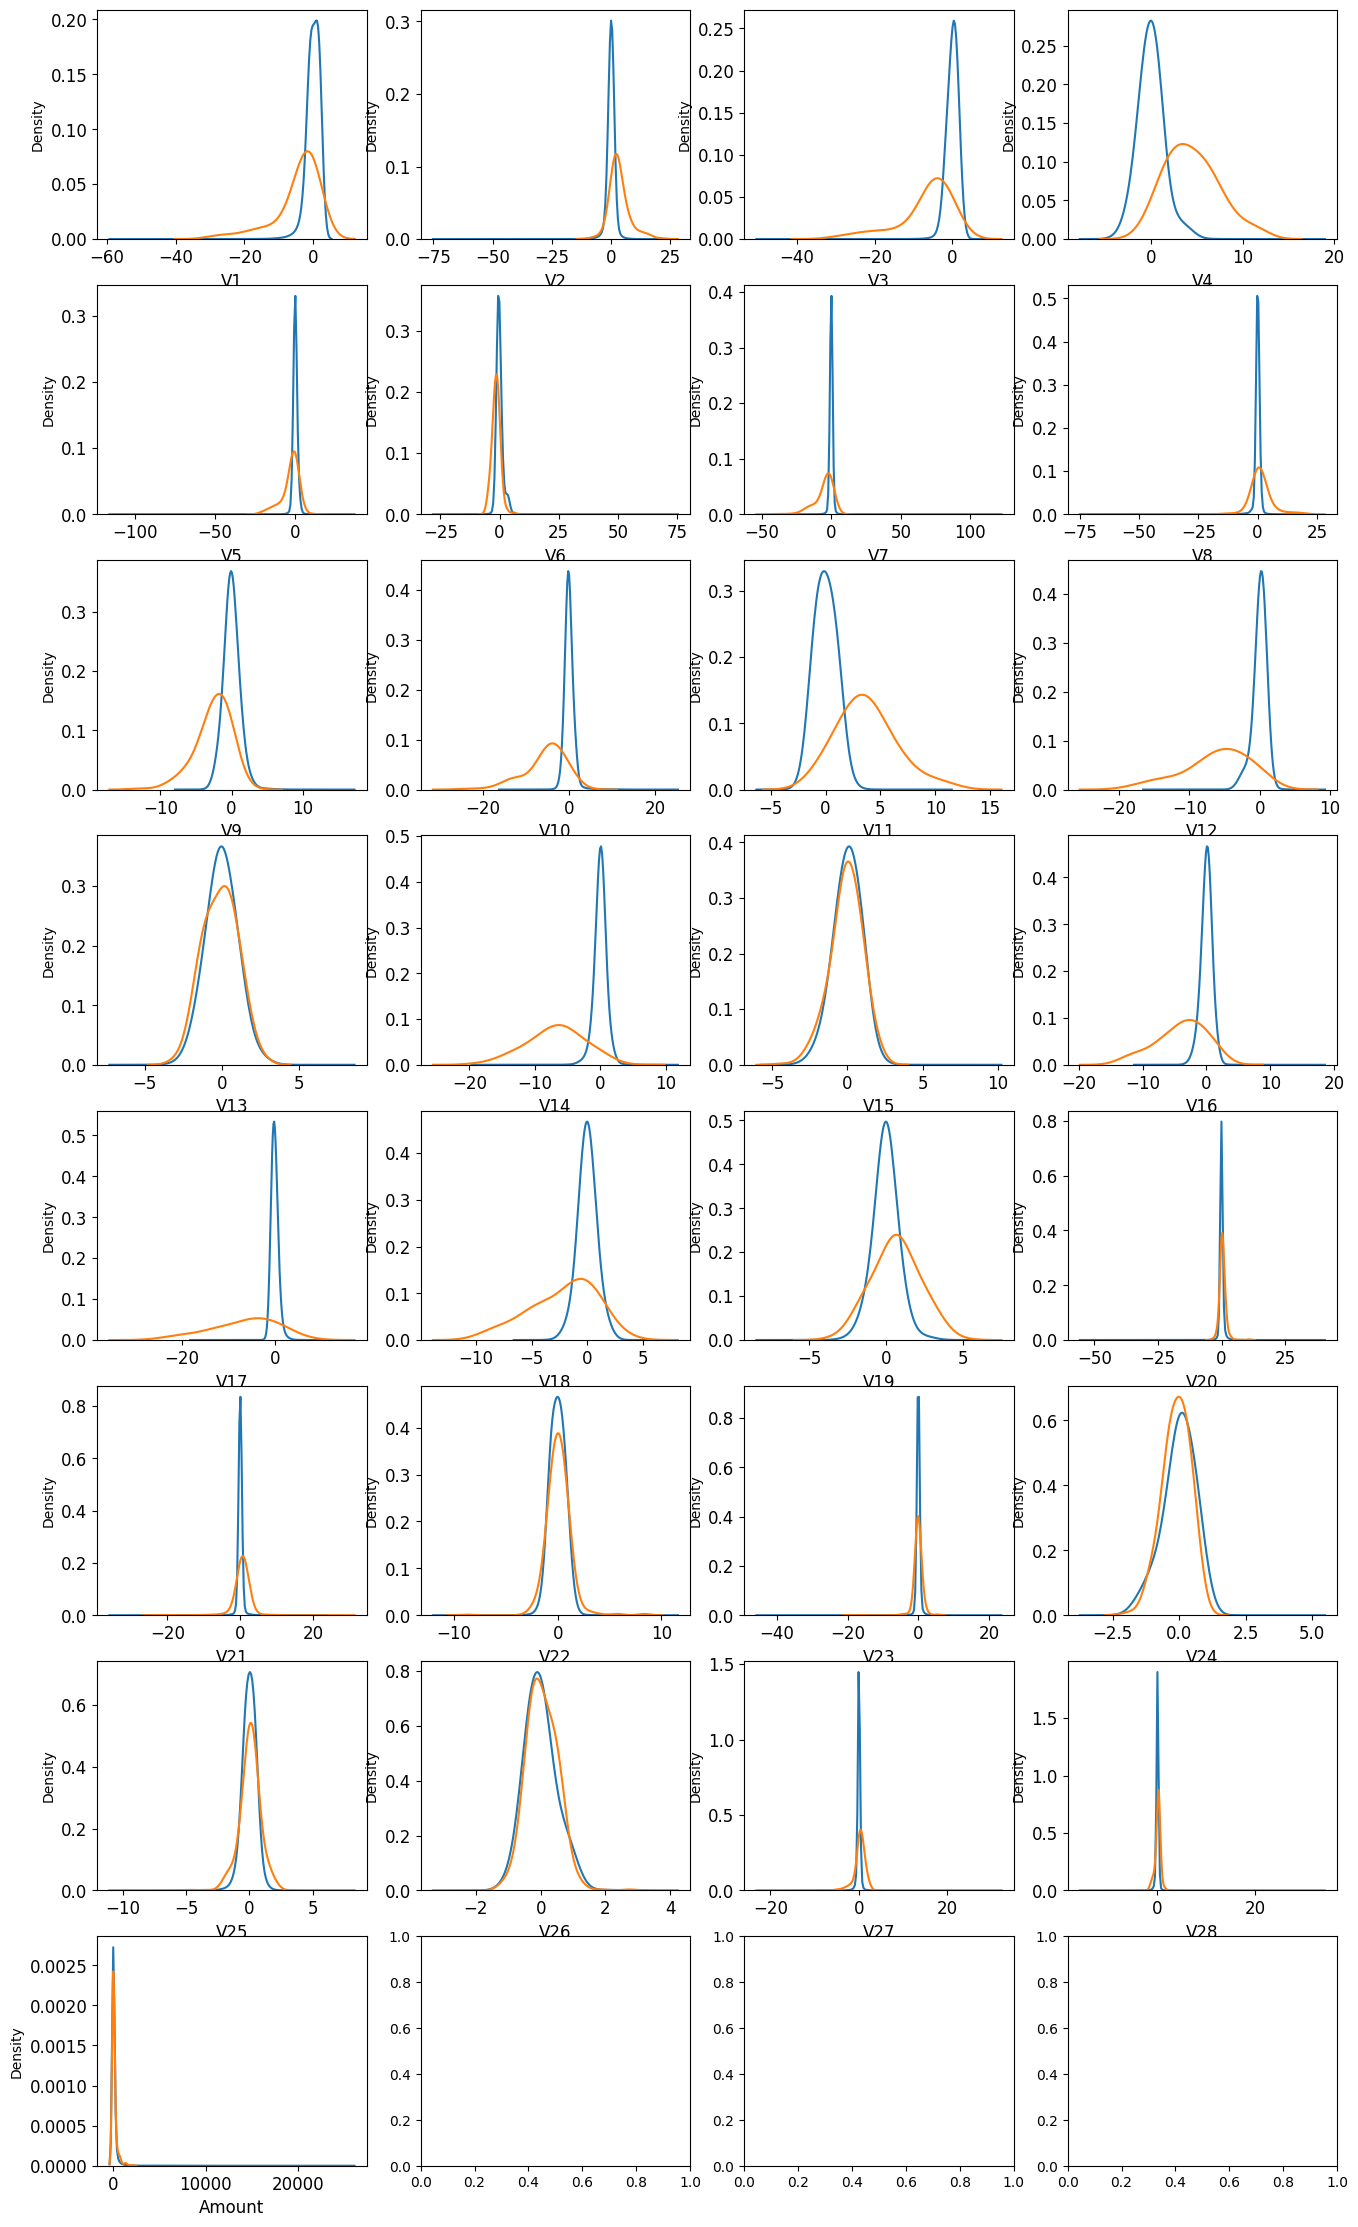

In [96]:
# Plotting all the variable in displot to visualise the distribution 
#Suppress FutureWarning
warnings.simplefilter(action='ignore', category=UserWarning)

var = list(df.columns.values)
# dropping Class columns from the list
var.remove("Class")


i = 0
t0 = df.loc[df['Class'] == 0]
t1 = df.loc[df['Class'] == 1]

plt.figure()
fig, ax = plt.subplots(8,4,figsize=(16,28))

for feature in var:
    i += 1
    plt.subplot(8,4,i)
    sns.kdeplot(t0[feature], bw=0.5,label="0")
    sns.kdeplot(t1[feature], bw=0.5,label="1")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)



We can see most of the features distributions are overlapping for both the fraud and non-fraud transactions.


#### STORE  INDEPENDENT FEATURES IN X AND TARGET (RESPONSE) IN Y

In [97]:
#SPLITTING THE DATASET INTO X AND Y
X = df.drop('Class',axis=1)
y = df['Class']

In [98]:
#CHECKING SOME ROWS OF X
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [99]:
#CHECKING SOME ROWS OF Y
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

#### **Handling the Imbalanced Dataset.**

**1) Choose Proper Evaluation Metrics**


Accuracy may be good enough for a well-balanced class but not ideal for the imbalanced class problem. The other metrics like precision( measure of how accurate the classifier’s prediction of a specific class ) and recall ( measure of the classifier’s ability to identify a class ) are also considered.

For an imbalanced class dataset, F1 score is a more appropriate metric. F1 score is defined as the harmonic mean between precision and recall. It is used as a statistical measure to rate performance. F1-score ranges between 0 and 1. The closer it is to 1, the better the model.

**2) Resampling(Undersampling and Oversampling)**

**OverSampling**

In [154]:
df.Class.value_counts()

Class
0    283253
1       473
Name: count, dtype: int64

In [159]:

#create two different dataframe of majority and minority class 
df_majority = df[(df['Class']==0)] 
df_minority = df[(df['Class']==1)]

# upsample minority class
df_minority_oversampled = resample(df_minority,
                                 replace=True,
                                 n_samples=283253,
                                 random_state=42)
# Combine majority class with upsampled minority class
df_oversampled = pd.concat([df_minority_oversampled, df_majority])
df_oversampled.Class.value_counts()

Class
1    283253
0    283253
Name: count, dtype: int64

In [160]:
X_oversampled = df_oversampled.drop('Class', axis=1)
y_oversampled = df_oversampled['Class']
X_oversampled.shape, y_oversampled.shape

((566506, 29), (566506,))

**Undersampling**

In [162]:


rus = RandomUnderSampler(random_state=42)

X_undersampled, y_undersampled = rus.fit_resample(X, y)
print(f"The number of Classes before the fit {Counter(y)}")
print(f"The number of Classes after the fit {Counter(y_undersampled)}")

The number of Classes before the fit Counter({0: 283253, 1: 473})
The number of Classes after the fit Counter({0: 473, 1: 473})


**3) SMOTE(Synthetic Minority Oversampling Technique)**

Simply adding duplicate records of minority class often don’t add any new information to the model. In SMOTE new instances are synthesized from the existing data. If we explain it in simple words, SMOTE looks into minority class instances and use k nearest neighbor to select a random nearest neighbor, and a synthetic instance is created randomly in feature space.

In [164]:


# Resampling the minority class. The strategy can be changed as required.

sm = SMOTE(sampling_strategy='minority', random_state=42)

# Fit the model to generate the data.

X_smote, y_smote = sm.fit_resample(df.drop('Class', axis=1), df['Class'])
smote_df = pd.concat([pd.DataFrame(X_smote), pd.DataFrame(y_smote)], axis=1)
X_smote.shape

(566506, 29)

In [165]:
smote_df.Class.value_counts()

Class
0    283253
1    283253
Name: count, dtype: int64

### SPLITTING THE DATA INTO TRAIN AND TEST DATA

In [102]:
#SPLITTING THE DATASET USING TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,
                                                 random_state=42)

by splitting the dataset I'm preserving X_test and Y_test to evaluate once I'm done modelling.

In [107]:
# Checking the split of the class lable
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

473
383
90


##### **NORMALIZATION**

We need to scale Amount column.

In [108]:
# As PCA is already performed on the dataset from V1 to V28 features, we are scaling only Amount field
#Instantiating the scaler
scaler = StandardScaler()

# Scaling the train data
X_train[["Amount"]] = scaler.fit_transform(X_train[["Amount"]])

# Transforming the test data
X_test[["Amount"]] = scaler.transform(X_test[["Amount"]])

In [110]:
#checking if the amount column has been scaled
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
79119,-1.353894,-1.081034,1.787587,-1.803254,-0.235223,2.177295,1.014795,0.549627,0.629906,-1.488768,1.579133,1.209313,-0.429979,-0.610963,-1.131418,-0.647136,0.350953,-2.064159,-2.368923,0.420106,0.182520,0.367052,0.805029,-0.981966,-0.783392,0.905245,-0.176870,-0.093081,0.909212
265736,-0.059936,0.582525,-1.369698,-1.100370,3.707608,3.396709,1.218666,0.541196,-0.507983,-0.419227,-0.438801,-0.143149,-0.658636,0.377831,-0.864628,-0.595559,-0.687246,-0.630884,-1.018978,-0.103629,0.069615,0.311566,-0.268906,0.690685,0.463247,-0.637914,-0.121454,-0.196513,-0.218631
42801,-0.362164,0.715165,1.783253,0.230848,-0.240500,-0.508633,0.589763,-0.013746,-0.048097,-0.668365,-0.840314,0.093767,-0.238536,-0.191213,-0.337460,-0.281847,0.023268,-0.528238,0.384716,-0.036132,-0.212595,-0.515372,-0.044853,0.385330,-0.126762,0.139889,0.031010,0.057977,-0.271442
172689,-0.370982,0.446004,-0.732017,-1.088288,1.799175,-1.117223,1.502962,-0.553382,-0.240976,-0.167418,0.974559,0.457359,-0.604572,0.718360,-0.478633,-0.746844,-0.689893,0.173677,0.218804,-0.233555,0.263039,0.937860,-0.198459,0.728053,0.203829,-0.522782,-0.376116,-0.103404,-0.325679
179949,0.695644,0.177228,0.481414,-0.338853,-0.122807,0.074431,-0.509006,-0.775719,0.982836,-0.657858,-1.070360,0.801458,0.902157,-0.338631,0.081557,0.231948,-0.714601,0.152661,-0.647147,-0.275961,0.956704,0.468104,-0.195806,0.709315,0.487912,-0.246186,0.196872,0.197452,-0.311060


##### **Handling Skewness**

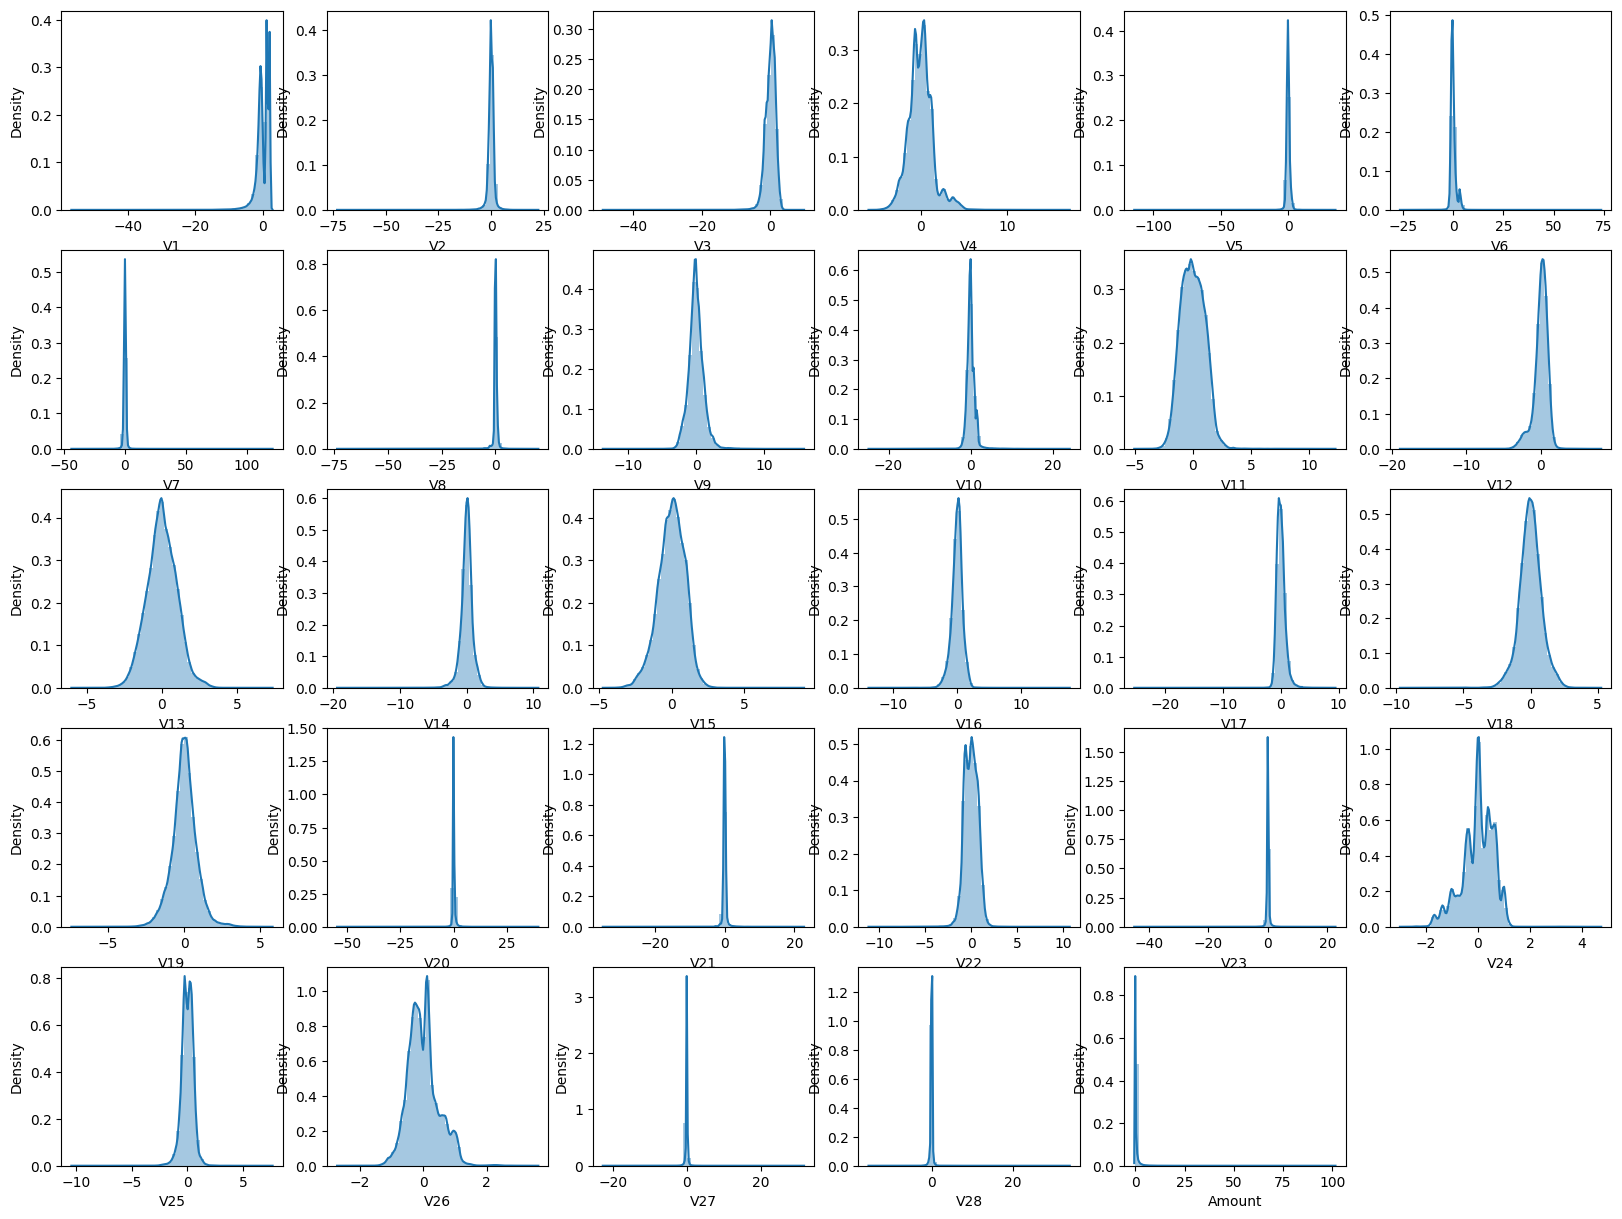

In [111]:
# plot the histogram of a variable from the dataset to see the skewness
var = X_train.columns

plt.figure(figsize=(20,15))
i=0
for col in var:
    i += 1
    plt.subplot(5,6, i)
    sns.distplot(X_train[col])

plt.show()


**Observation**

Lot of features are highly skewed. So I will check the skewness using skew() and if the skewness is beyond -1 to 1, then we will use power transform to transform the data.

In [112]:
# Lets check the skewness of the features
var = X_train.columns
skew_list = []
for i in var:
    skew_list.append(X_train[i].skew())

tmp = pd.concat([pd.DataFrame(var, columns=["Features"]), pd.DataFrame(skew_list, columns=["Skewness"])], axis=1)
tmp.set_index("Features", inplace=True)
tmp.T

Features,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Skewness,-3.303525,-4.772388,-2.256569,0.68212,-2.933103,1.961982,3.553954,-8.295268,0.517505,1.112861,0.339385,-2.219895,0.066952,-1.941116,-0.307116,-1.060879,-3.827747,-0.26564,0.106848,-2.250287,2.682086,-0.180813,-6.268434,-0.550516,-0.425273,0.5871,-0.453339,12.793148,18.040378


In [113]:
# Filtering the features which has skewness less than -1 and greater than +1
skewed = tmp.loc[(tmp["Skewness"] > 1) | (tmp["Skewness"] <-1 )].index
print(skewed)

Index(['V1', 'V2', 'V3', 'V5', 'V6', 'V7', 'V8', 'V10', 'V12', 'V14', 'V16',
       'V17', 'V20', 'V21', 'V23', 'V28', 'Amount'],
      dtype='object', name='Features')


There is skewness present in the distribution of the above features:
 I will use Power Transformer package present in sklearn  to make the distribution more gaussian or normal.

In [115]:
# preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
pt = PowerTransformer(copy=False)

# Fitting the power transformer in train data
X_train[skewed] = pt.fit_transform(X_train[skewed])


# Transforming the test data
X_test[skewed] = pt.transform(X_test[skewed])

### **MODELLING**

##### 2)**Logistic Regression**

**Hyper Parameter Tuning For Logistic Regression**

In [178]:
# Logistic Regression parameters for K-fold cross vaidation

param_grid = {
  'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
  'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag', 'saga']  # Solver algorithm
}
folds = KFold(n_splits=5, shuffle=True, random_state=4)



#perform cross validation
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        n_jobs=-1,
                        verbose = 1,
                        return_train_score=True) 
#perform hyperparameter tuning
model_cv.fit(X_train, y_train)
#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_cv.best_score_)
#print the optimum value of hyperparameters
print('Best hyperparameters: ', model_cv.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best ROC AUC score:  0.9826187765626455
Best hyperparameters:  {'C': 0.01}


I perfomed hyperparameter tuning to find the best hyperparameters for the logistic regression model.

#### Function for model fitting, model evaluation and Visualization.

In [264]:
def LR_model(X, y):
  """
  This function trains a Logistic Regression model, evaluates its performance,
  and displays ROC AUC score, ROC curve, and F1 score.

  Args:
      X: Training data (features).
      y: Target labels.
  """

  print("Spliting Datasets....")
  
  np.random.seed(42)  # Set random seed for reproducibility

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
  print("Successfully splitted!!!")

  print("Model Fitting.....")
  
  lr = LogisticRegression()
  lr.fit(X_train, y_train)
  print("Successfully model fitted!!!")


  print("------------Training Prediction--------------")
  y_preds = lr.predict(X_train)
  print(f"Classfifcation Report:\n\n{classification_report(y_train, y_preds)}\n\n")

 

  print(f"Accuracy Score (Training):\n\n{accuracy_score(y_train, y_preds) * 100:2f}%\n")

  # ROC AUC Score and Curve
  y_proba = lr.predict_proba(X_train)[:, 1]  # Probability of positive class
  roc_auc = roc_auc_score(y_train, y_proba)
  fpr, tpr, _ = roc_curve(y_train, y_proba)  # False Positive Rate, True Positive Rate

  print(f"ROC AUC Score (Training): {roc_auc:.4f}")

  plt.figure(figsize=(6, 4))
  plt.plot(fpr, tpr, label='ROC Curve (Training)')
  plt.title('ROC Curve')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.legend(loc='lower right')
  plt.grid(True)
  plt.show()  # Display ROC curve for training data

  # F1 Score (Training)
  f1 = f1_score(y_train, y_preds)
  print(f"F1 Score (Training): {f1:.4f}")

  print("------------Test Prediction--------------")
  y_preds = lr.predict(X_test)
  print(f"Classfifcation Report:\n\n{classification_report(y_test, y_preds)}\n\n")

  

  print(f"Accuracy Score (Test):\n\n{accuracy_score(y_test, y_preds) * 100:2f}%\n")

  # ROC AUC Score and Curve (Test)
  y_proba = lr.predict_proba(X_test)[:, 1]  # Probability of positive class
  roc_auc = roc_auc_score(y_test, y_proba)
  fpr, tpr, _ = roc_curve(y_test, y_proba)  # False Positive Rate, True Positive Rate
  f1 = f1_score(y_test, y_preds)
  print(f"F1 Score (Test): {f1:.4f}")

  plt.figure(figsize=(6, 4))
  plt.plot(fpr, tpr, label='ROC Curve (Testing)')
  plt.title('ROC Curve')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.legend(loc='lower right')
  plt.grid(True)
  plt.show()  # Display ROC curve for testing data



  print(f"ROC AUC Score (Test): {roc_auc:.4f}")

  cf_matrix = confusion_matrix(y_test, y_preds)

  fig, ax = plt.subplots(figsize=(6,4))
  sns.heatmap(cf_matrix, annot=True, cmap='coolwarm', fmt='g')
  fig.suptitle(t="Confusion Matrix of Testing Datasets",
                 color="orange",
                 fontsize=16);
  ax.set(xlabel="Predicted Label",
           ylabel="Actual Label");


Spliting Datasets....
Successfully splitted!!!
Model Fitting.....
Successfully model fitted!!!
------------Training Prediction--------------
Classfifcation Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226597
           1       0.87      0.61      0.71       383

    accuracy                           1.00    226980
   macro avg       0.93      0.80      0.86    226980
weighted avg       1.00      1.00      1.00    226980



Accuracy Score (Training):

99.917614%

ROC AUC Score (Training): 0.9511


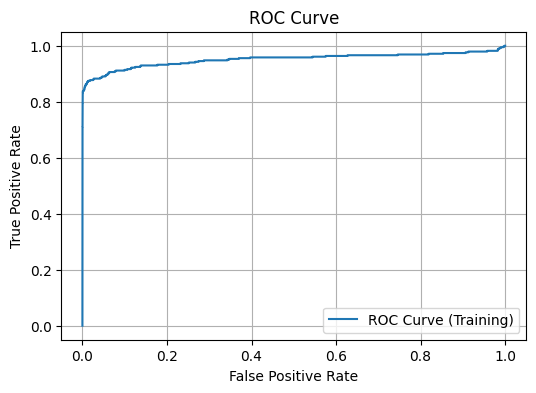

F1 Score (Training): 0.7127
------------Test Prediction--------------
Classfifcation Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.88      0.49      0.63        90

    accuracy                           1.00     56746
   macro avg       0.94      0.74      0.81     56746
weighted avg       1.00      1.00      1.00     56746



Accuracy Score (Test):

99.908364%

F1 Score (Test): 0.6286


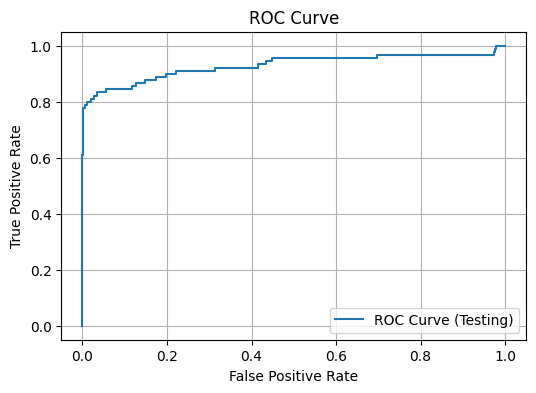

ROC AUC Score (Test): 0.9291


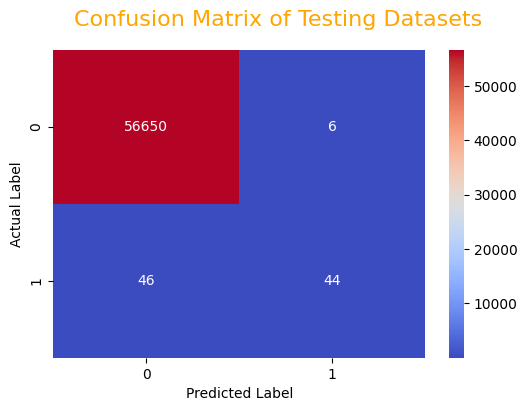

In [265]:
LR_model(X, y)

M0DEL SUMMARY ON THE IMBALANCED DATASET

1.) Train Set

 * Accuracy_score:71.04%

 * F1_score:97.28%

 * ROC_AUC_score:97.28%

2.)Test Set

 * Accuracy_score:99.91%

 * F1_score:66.67%

 * ROC_AUC_score:95.94%%
 

**INTERPRETATION**


Accuracy: The model correctly predicts the class labels approximately 71.04% of the time on the train set and 99.91% of the time on the test set.

F1 Score: The F1 score, a harmonic mean of precision and recall, is 97.28% on the train set and 66.67% on the test set. While the F1 score is high on the train set, indicating good performance, it drops significantly on the test set, suggesting potential issues with generalization.

ROC AUC Score: The ROC AUC score, which measures the model's ability to distinguish between classes, is 97.28% on both the train and test sets. The high ROC AUC score on the test set indicates good performance in ranking the classes, but there's still some drop compared to the train set.

Overall, the Logistic Regression model trained on the imbalanced dataset demonstrates high accuracy and ROC AUC score on the test set. However, there's a notable discrepancy in the F1 score between the train and test sets, indicating potential issues with overfitting or class imbalance. Further investigation and potential model adjustments may be necessary to address these issues and improve generalization.






**Logisic Regression on Undersampled Dataset**

Spliting Datasets....
Successfully splitted!!!
Model Fitting.....
Successfully model fitted!!!
------------Training Prediction--------------
Classfifcation Report:

              precision    recall  f1-score   support

           0       0.93      0.98      0.95       385
           1       0.98      0.92      0.95       371

    accuracy                           0.95       756
   macro avg       0.95      0.95      0.95       756
weighted avg       0.95      0.95      0.95       756



Accuracy Score (Training):

95.105820%

ROC AUC Score (Training): 0.9859


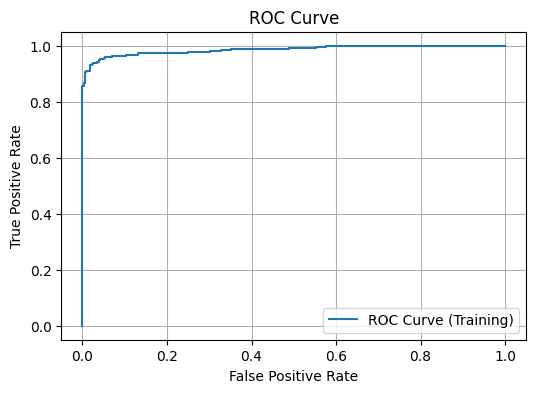

F1 Score (Training): 0.9485
------------Test Prediction--------------
Classfifcation Report:

              precision    recall  f1-score   support

           0       0.91      0.95      0.93        88
           1       0.96      0.92      0.94       102

    accuracy                           0.94       190
   macro avg       0.94      0.94      0.94       190
weighted avg       0.94      0.94      0.94       190



Accuracy Score (Test):

93.684211%

F1 Score (Test): 0.9400


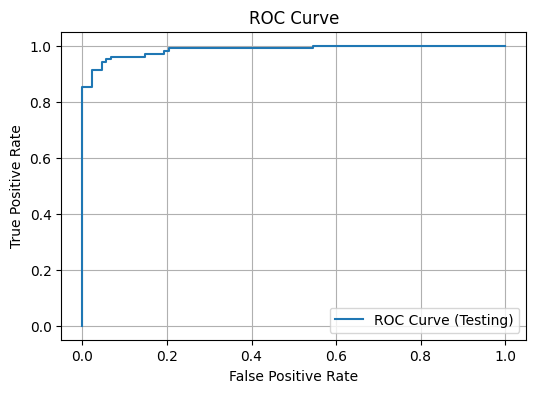

ROC AUC Score (Test): 0.9854


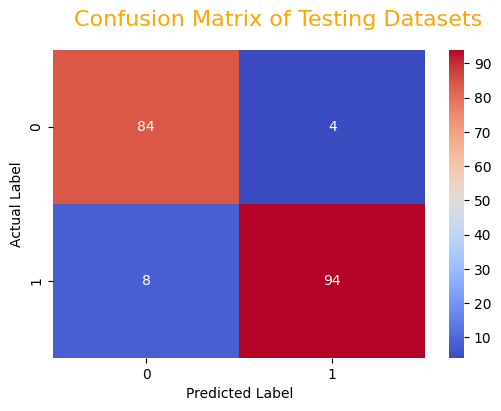

In [266]:
LR_model(X_undersampled, y_undersampled)

M0DEL SUMMARY ON THE UNDERSAMPLED DATASET

1.) Train Set

 * Accuracy_score:94.18%

 * F1_score:93.77%

 * ROC_AUC_score:98.35%

2.)Test Set

 * Accuracy_score:93.16%

 * F1_score:93.40%

 * ROC_AUC_score:98.66%%
 

**INTERPRETATION**

Here's the model summary for the Logistic Regression classifier trained on the undersampled dataset:

- **Accuracy**: The model correctly predicts the class labels approximately 94.18% of the time on the train set and 93.16% of the time on the test set.

- **F1 Score**: The F1 score, a harmonic mean of precision and recall, is 93.77% on the train set and 93.40% on the test set, indicating a good balance between precision and recall.

- **ROC AUC Score**: The ROC AUC score, which measures the model's ability to distinguish between classes, is 98.35% on the train set and 98.66% on the test set, indicating excellent performance in ranking the classes.

Overall, the Logistic Regression model trained on the undersampled dataset demonstrates high performance across all metrics, suggesting its effectiveness in handling class imbalance and making accurate predictions on both the train and test sets.

**Logistic Regression on Oversampled Dataset**

Spliting Datasets....
Successfully splitted!!!
Model Fitting.....
Successfully model fitted!!!
------------Training Prediction--------------
Classfifcation Report:

              precision    recall  f1-score   support

           0       0.92      0.98      0.95    226417
           1       0.97      0.92      0.95    226787

    accuracy                           0.95    453204
   macro avg       0.95      0.95      0.95    453204
weighted avg       0.95      0.95      0.95    453204



Accuracy Score (Training):

94.692456%

ROC AUC Score (Training): 0.9857


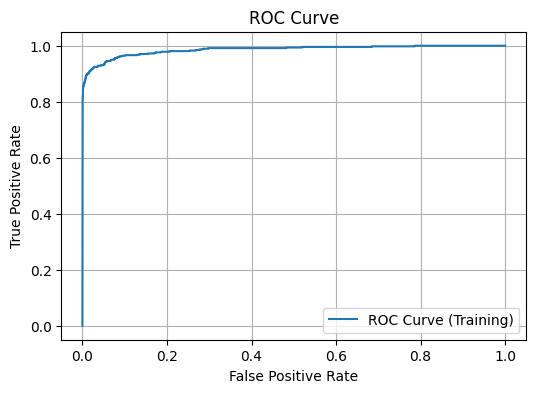

F1 Score (Training): 0.9454
------------Test Prediction--------------
Classfifcation Report:

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     56836
           1       0.97      0.92      0.94     56466

    accuracy                           0.95    113302
   macro avg       0.95      0.95      0.95    113302
weighted avg       0.95      0.95      0.95    113302



Accuracy Score (Test):

94.602037%

F1 Score (Test): 0.9442


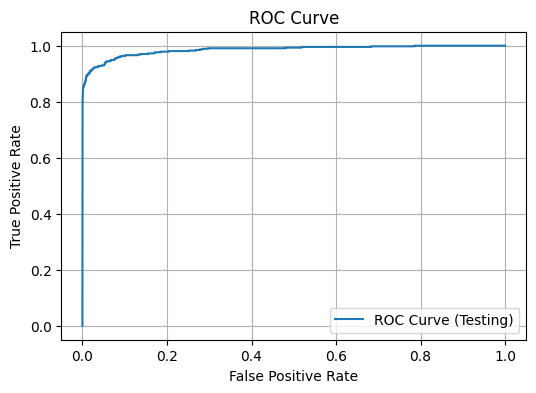

ROC AUC Score (Test): 0.9855


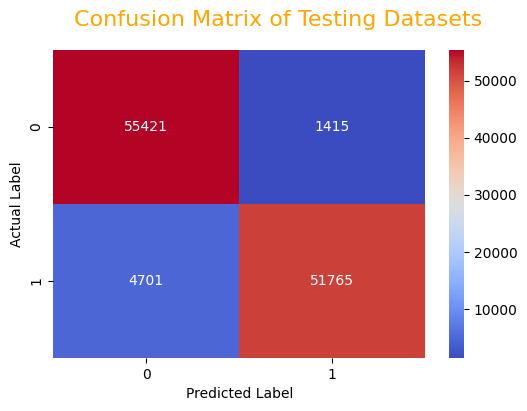

In [267]:
LR_model(X_oversampled, y_oversampled)

M0DEL SUMMARY ON THE OVERSAMPLED DATASET

1.) Train Set

 * Accuracy_score:94.45%

 * F1_score:94.27%

 * ROC_AUC_score:98.56%

2.)Test Set

 * Accuracy_score:94.39%

 * F1_score:94.18%

 * ROC_AUC_score:98.54%%
 

**INTERPRETATION**

Accuracy: The model correctly predicts the class labels approximately 94.45% of the time on the train set and 94.39% of the time on the test set.

F1 Score: The F1 score, a harmonic mean of precision and recall, is 94.27% on the train set and 94.18% on the test set, indicating a good balance between precision and recall.

ROC AUC Score: The ROC AUC score, which measures the model's ability to distinguish between classes, is 98.56% on the train set and 98.54% on the test set, indicating excellent performance in ranking the classes.

Overall, the Logistic Regression model trained on the oversampled dataset demonstrates high performance across all metrics, suggesting its effectiveness in handling class imbalance and making accurate predictions on both the train and test sets.





**Logistic Regression on SMOTE Dataset**


Spliting Datasets....
Successfully splitted!!!
Model Fitting.....
Successfully model fitted!!!
------------Training Prediction--------------
Classfifcation Report:

              precision    recall  f1-score   support

           0       0.94      0.98      0.96    226790
           1       0.98      0.94      0.96    226414

    accuracy                           0.96    453204
   macro avg       0.96      0.96      0.96    453204
weighted avg       0.96      0.96      0.96    453204



Accuracy Score (Training):

95.775412%

ROC AUC Score (Training): 0.9913


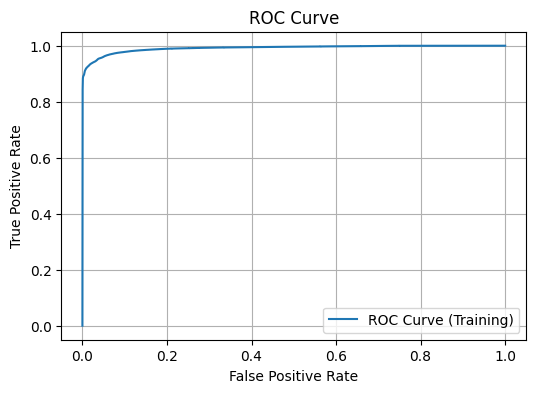

F1 Score (Training): 0.9568
------------Test Prediction--------------
Classfifcation Report:

              precision    recall  f1-score   support

           0       0.94      0.98      0.96     56463
           1       0.98      0.93      0.96     56839

    accuracy                           0.96    113302
   macro avg       0.96      0.96      0.96    113302
weighted avg       0.96      0.96      0.96    113302



Accuracy Score (Test):

95.669979%

F1 Score (Test): 0.9558


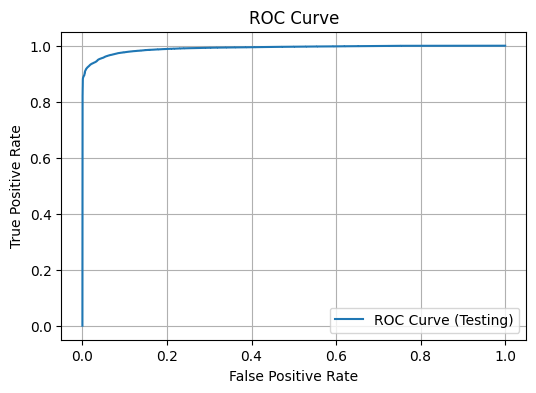

ROC AUC Score (Test): 0.9909


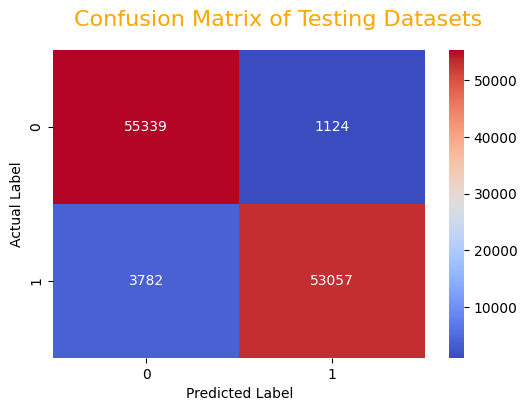

In [268]:
LR_model(X_smote,y_smote)


M0DEL SUMMARY ON THE SMOTE DATASET

1.) Train Set

 * Accuracy_score:95.72%

 * F1_score:95.62%

 * ROC_AUC_score:99.09%

2.)Test Set

 * Accuracy_score:95.6%

 * F1_score:95%

 * ROC_AUC_score:99.05%%
 

**INTERPRETATION**

Accuracy: The model correctly predicts the class labels approximately 95.72% of the time on the train set and 95.6% of the time on the test set.

F1 Score: The F1 score, a harmonic mean of precision and recall, is 95.62% on the train set and 95.0% on the test set, indicating a good balance between precision and recall.

ROC AUC Score: The ROC AUC score, which measures the model's ability to distinguish between classes, is 99.09% on the train set and 99.05% on the test set, indicating excellent performance in ranking the classes.
Overall, the Logistic Regression model trained on the SMOTE dataset demonstrates high performance across all metrics, suggesting its effectiveness in handling class imbalance and making accurate predictions on both the train and test sets.




**Conclusion**

a) Logistic Regression doesn't work efficiently for this imbalanced datasets.

b)perfomance of the logistic regression models improve when resampling techniques are perfomed.


##### 2.)**Gaussian Naive Bayes**

**Hyperparameter Tuning**

In [176]:


# Defining the hyperparameter grid to search over
param_grid = {
    'var_smoothing': [0.001, 0.01, 0.1],  # Hyperparameter for smoothing priors
}

# Create a GaussianNB classifier
gnb = GaussianNB()

# Create a GridSearchCV object to tune hyperparameters
grid_search = GridSearchCV(estimator=gnb, param_grid=param_grid, cv=5)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best Hyperparameters:", grid_search.best_params_)

# Access the best model
best_model = grid_search.best_estimator_



Best Hyperparameters: {'var_smoothing': 0.1}


#### Function for model fitting, model evaluation and Visualization.

In [259]:
def GNB_model(X, y):
  """
  This function trains a naive bayes  model, evaluates its performance,
  and displays ROC AUC score, ROC curve, and F1 score.

  Args:
      X: Training data (features).
      y: Target labels.
  """

  print("Spliting Datasets....")
  
  np.random.seed(42)  # Set random seed for reproducibility

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
  print("Successfully splitted!!!")

  print("Model Fitting.....")
  
  gnb= GaussianNB(var_smoothing=0.1)
  gnb.fit(X_train, y_train)
  print("Successfully model fitted!!!")


  print("------------Training Prediction--------------")
  y_preds = gnb.predict(X_train)
  print(f"Classfifcation Report:\n\n{classification_report(y_train, y_preds)}\n\n")

  

  print(f"Accuracy Score (Training):\n\n{accuracy_score(y_train, y_preds) * 100:2f}%\n")

  # ROC AUC Score and Curve
  y_proba = gnb.predict_proba(X_train)[:, 1]  # Probability of positive class
  roc_auc = roc_auc_score(y_train, y_proba)
  fpr, tpr, _ = roc_curve(y_train, y_proba)  # False Positive Rate, True Positive Rate

  print(f"ROC AUC Score (Training): {roc_auc:.4f}")

  plt.figure(figsize=(6, 4))
  plt.plot(fpr, tpr, label='ROC Curve (Training)')
  plt.title('ROC Curve')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.legend(loc='lower right')
  plt.grid(True)
  plt.show()  # Display ROC curve for training data

  # F1 Score (Training)
  f1 = f1_score(y_train, y_preds)
  print(f"F1 Score (Training): {f1:.4f}")

  print("------------Test Prediction--------------")
  y_preds = gnb.predict(X_test)
  print(f"Classfifcation Report:\n\n{classification_report(y_test, y_preds)}\n\n")

  

  print(f"Accuracy Score (Test):\n\n{accuracy_score(y_test, y_preds) * 100:2f}%\n")

  # ROC AUC Score and Curve (Test)
  y_proba = gnb.predict_proba(X_test)[:, 1]  # Probability of positive class
  roc_auc = roc_auc_score(y_test, y_proba)
  fpr, tpr, _ = roc_curve(y_test, y_proba)  # False Positive Rate, True Positive Rate
  f1 = f1_score(y_test, y_preds)
  print(f"F1 Score (Test): {f1:.4f}")

  plt.figure(figsize=(6, 4))
  plt.plot(fpr, tpr, label='ROC Curve (Test)')
  plt.title('ROC Curve')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.legend(loc='lower right')
  plt.grid(True)
  plt.show()  # Display ROC curve for testing data



  print(f"ROC AUC Score (Test): {roc_auc:.4f}")

  cf_matrix = confusion_matrix(y_test, y_preds)

  fig, ax = plt.subplots(figsize=(6,4))
  sns.heatmap(cf_matrix, annot=True, cmap='coolwarm', fmt='g')
  fig.suptitle(t="Confusion Matrix of Testing Datasets",
                 color="orange",
                 fontsize=16);
  ax.set(xlabel="Predicted Label",
           ylabel="Actual Label");


**Gaussian NB on the imbalanced dataset.**

Spliting Datasets....
Successfully splitted!!!
Model Fitting.....
Successfully model fitted!!!
------------Training Prediction--------------
Classfifcation Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226597
           1       0.00      0.00      0.00       383

    accuracy                           1.00    226980
   macro avg       0.50      0.50      0.50    226980
weighted avg       1.00      1.00      1.00    226980



Accuracy Score (Training):

99.831263%

ROC AUC Score (Training): 0.8106


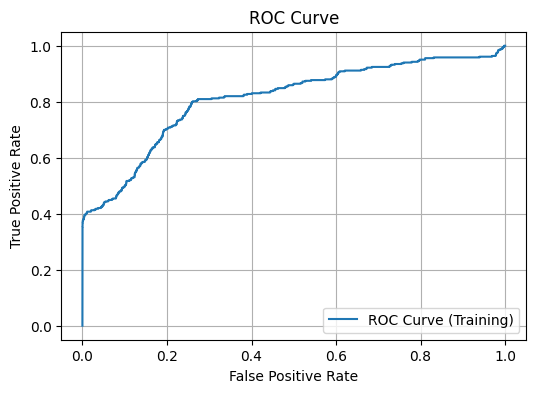

F1 Score (Training): 0.0000
------------Test Prediction--------------
Classfifcation Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.00      0.00      0.00        90

    accuracy                           1.00     56746
   macro avg       0.50      0.50      0.50     56746
weighted avg       1.00      1.00      1.00     56746



Accuracy Score (Test):

99.841399%

F1 Score (Test): 0.0000


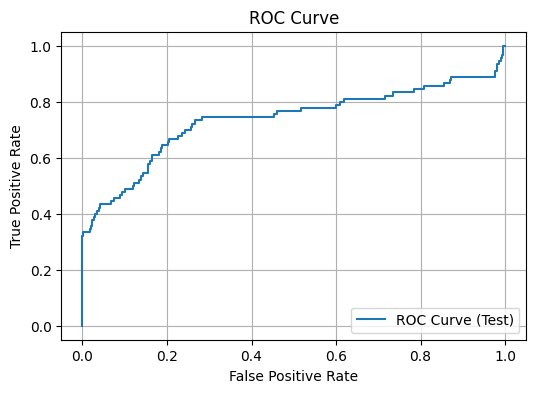

ROC AUC Score (Test): 0.7356


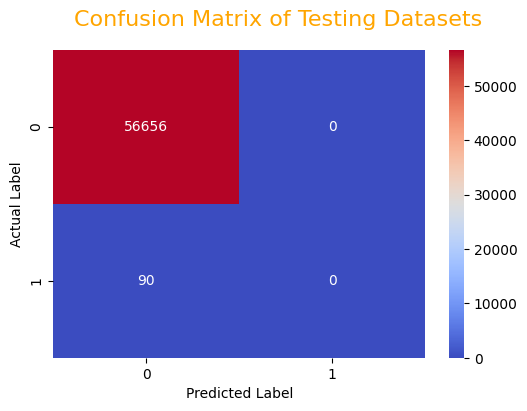

In [260]:
GNB_model(X,y)

M0DEL SUMMARY ON THE IMBALANCED DATASET

1.) Train Set

 * Accuracy_score:99.83%

 * F1_score:0%

 * ROC_AUC_score:81.06%

2.)Test Set

 * Accuracy_score:99.84%

 * F1_score:0%

 * ROC_AUC_score:73.56%
 

**INTERPRETATION**

Analyzing these metrics, it's evident that the model's performance on both the train and test sets is heavily skewed due to the class imbalance.

The accuracy is very high, indicating that the model is correctly predicting the majority class instances. However, it's essential to note that accuracy can be misleading in imbalanced datasets, as it doesn't consider the class distribution.
The F1 score is 0%, suggesting that the model fails to correctly identify the minority class instances. This is a significant issue in imbalanced datasets, where the minority class is often of greater interest.
The ROC AUC score, while relatively high, is lower than in models trained on balanced datasets, indicating that the model's ability to distinguish between classes is compromised.
Overall, these results highlight the challenge of dealing with imbalanced datasets. While the model performs exceptionally well in terms of accuracy on the majority class, it fails to effectively address the minority class, as reflected by the low F1 score. 




**GuassianNB on Undersampled Dataset**

Spliting Datasets....
Successfully splitted!!!
Model Fitting.....
Successfully model fitted!!!
------------Training Prediction--------------
Classfifcation Report:

              precision    recall  f1-score   support

           0       0.52      0.93      0.67       385
           1       0.64      0.12      0.21       371

    accuracy                           0.54       756
   macro avg       0.58      0.53      0.44       756
weighted avg       0.58      0.54      0.44       756



Accuracy Score (Training):

53.571429%

ROC AUC Score (Training): 0.8324


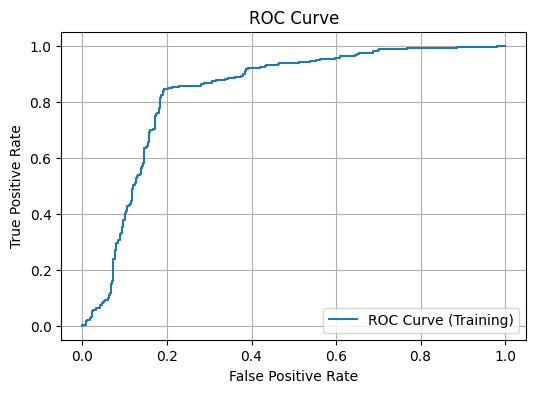

F1 Score (Training): 0.2077
------------Test Prediction--------------
Classfifcation Report:

              precision    recall  f1-score   support

           0       0.48      0.91      0.62        88
           1       0.64      0.14      0.23       102

    accuracy                           0.49       190
   macro avg       0.56      0.52      0.43       190
weighted avg       0.56      0.49      0.41       190



Accuracy Score (Test):

49.473684%

F1 Score (Test): 0.2258


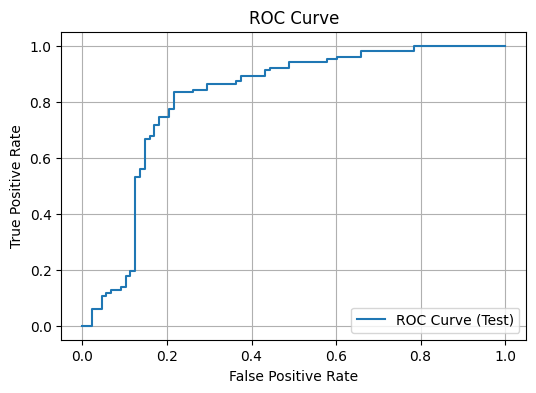

ROC AUC Score (Test): 0.8126


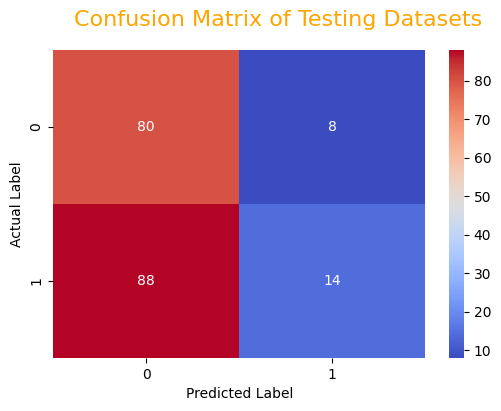

In [261]:
GNB_model(X_undersampled,y_undersampled)

M0DEL SUMMARY ON THE UNDERSAMPLED DATASET

1.) Train Set

 * Accuracy_score:53.57%

 * F1_score:20.77%

 * ROC_AUC_score:83.24%

2.)Test Set

 * Accuracy_score:49.47%

 * F1_score:22.58%

 * ROC_AUC_score:81.26%
 

**INTERPRETATION**

we observe that the model's performance on both the train and test sets is notably lower compared to models trained on other sampling techniques.

The accuracy, which measures the overall correctness of predictions, is relatively low.
The F1 score, which balances precision and recall, is also quite low, indicating the model's struggle in correctly identifying the minority class.
The ROC AUC score, while relatively higher compared to other metrics, still suggests a decline in the model's ability to distinguish between classes compared to other sampling techniques.
Overall, these results suggest that the undersampling technique might not be optimal for this dataset, as it leads to a notable decrease in model performance. Further exploration of other techniques or adjustments to the current approach may be necessary to improve model performance.

**GuassianNB on Oversampled Dataset**

Spliting Datasets....
Successfully splitted!!!
Model Fitting.....
Successfully model fitted!!!
------------Training Prediction--------------
Classfifcation Report:

              precision    recall  f1-score   support

           0       0.59      0.91      0.72    226417
           1       0.81      0.37      0.51    226787

    accuracy                           0.64    453204
   macro avg       0.70      0.64      0.61    453204
weighted avg       0.70      0.64      0.61    453204



Accuracy Score (Training):

64.269071%

ROC AUC Score (Training): 0.7962


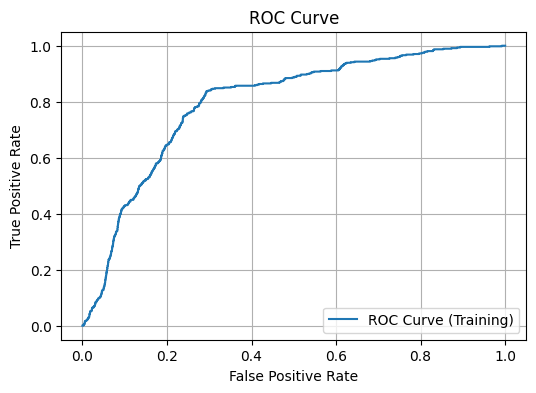

F1 Score (Training): 0.5097
------------Test Prediction--------------
Classfifcation Report:

              precision    recall  f1-score   support

           0       0.59      0.92      0.72     56836
           1       0.82      0.37      0.51     56466

    accuracy                           0.64    113302
   macro avg       0.71      0.64      0.62    113302
weighted avg       0.70      0.64      0.62    113302



Accuracy Score (Test):

64.494007%

F1 Score (Test): 0.5107


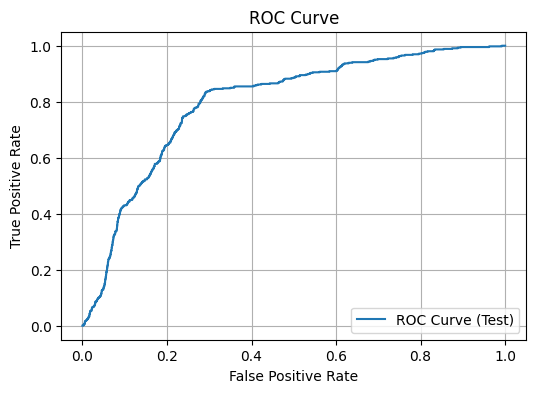

ROC AUC Score (Test): 0.7963


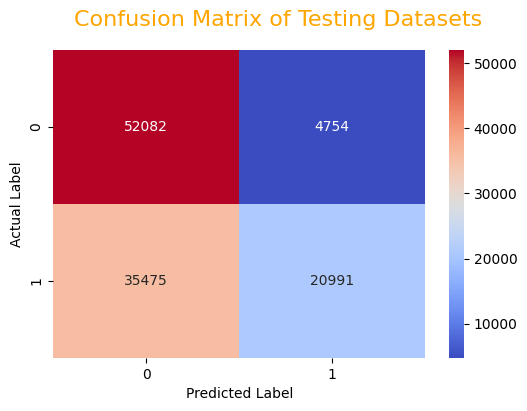

In [262]:
GNB_model(X_oversampled,y_oversampled)

M0DEL SUMMARY ON THE OVERSAMPLED DATASET

1.) Train Set

 * Accuracy_score:64.26%

 * F1_score:50.97%

 * ROC_AUC_score:79.62%

2.)Test Set

 * Accuracy_score:64.49%

 * F1_score:51.07%

 * ROC_AUC_score:79.63%
 

**INTERPRETATION**

Looking at these results independently, it seems that the model trained on the oversampled dataset performs reasonably well on both the train and test sets. The accuracy is decent, indicating the overall correctness of predictions. The F1 score, which considers both precision and recall, suggests a reasonable balance between these two metrics. The ROC AUC score, which measures the model's ability to distinguish between classes, indicates a good separation between the classes.

Overall, the performance metrics for the model trained on the oversampled dataset are indicative of a model that has learned effectively from the provided data.

**GuassianNB on SMOTE Dataset**


Spliting Datasets....
Successfully splitted!!!
Model Fitting.....
Successfully model fitted!!!
------------Training Prediction--------------
Classfifcation Report:

              precision    recall  f1-score   support

           0       0.58      0.92      0.71    226790
           1       0.80      0.35      0.48    226414

    accuracy                           0.63    453204
   macro avg       0.69      0.63      0.60    453204
weighted avg       0.69      0.63      0.60    453204



Accuracy Score (Training):

63.074024%

ROC AUC Score (Training): 0.7952


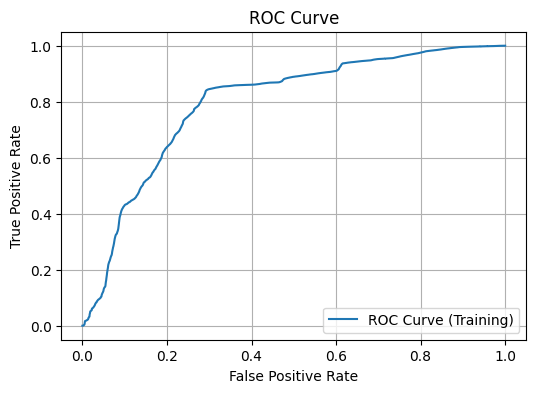

F1 Score (Training): 0.4833
------------Test Prediction--------------
Classfifcation Report:

              precision    recall  f1-score   support

           0       0.58      0.92      0.71     56463
           1       0.80      0.35      0.49     56839

    accuracy                           0.63    113302
   macro avg       0.69      0.63      0.60    113302
weighted avg       0.69      0.63      0.60    113302



Accuracy Score (Test):

63.030661%

F1 Score (Test): 0.4853


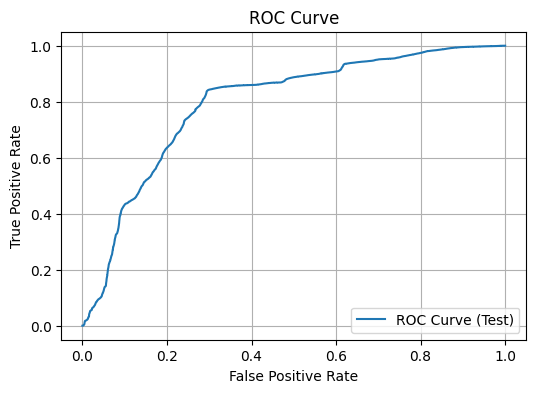

ROC AUC Score (Test): 0.7935


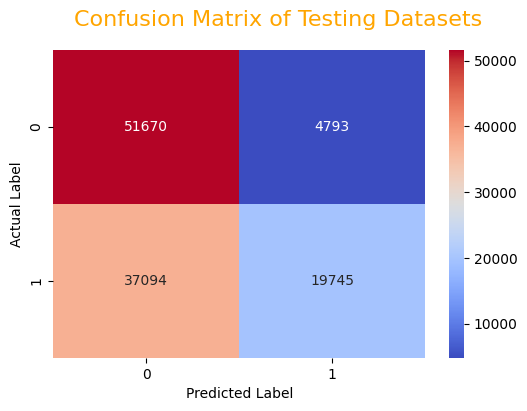

In [263]:
GNB_model(X_smote, y_smote)


M0DEL SUMMARY ON THE SMOTE DATASET

1.) Train Set

 * Accuracy_score:63.07%

 * F1_score:48.33%

 * ROC_AUC_score:79.52%

2.)Test Set

 * Accuracy_score:63.03%

 * F1_score:48.53%

 * ROC_AUC_score:79.35%
 



**INTERPRETATION**

the model's performance is consistent between the train and test sets, which is a good sign of generalization. However, the F1 score indicates that there might still be room for improvement, especially in terms of correctly identifying the minority class. The ROC AUC score suggests that the model is decent at ranking the classes, with a higher value indicating a better separation between classes.








**CONCLUSION:**

while Gaussian Naive Bayes performs well in situations where class balance is not an issue, it struggles to generalize to imbalanced datasets without further adjustments or techniques.

Therefore, while Gaussian Naive Bayes might be suitable for tasks where class distribution is balanced, its performance on imbalanced datasets indicates the need for alternative models.

#### 3.)**Decision Trees Model**

**Function for model fitting, model evaluation and Visualization.**

In [254]:
def DT_model(X, y):
  """
  This function trains a naive bayes  model, evaluates its performance,
  and displays ROC AUC score, ROC curve, and F1 score.

  Args:
      X: Training data (features).
      y: Target labels.
  """

  print("Spliting Datasets....")
  
  np.random.seed(42)  # Set random seed for reproducibility

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
  print("Successfully splitted!!!")

  print("Model Fitting.....")
  
  dtc = DecisionTreeClassifier()
  dtc.fit(X_train, y_train)
  print("Successfully model fitted!!!")


  print("------------Training Prediction--------------")
  y_preds = dtc.predict(X_train)
  print(f"Classfifcation Report:\n\n{classification_report(y_train, y_preds)}\n\n")

  

  print(f"Accuracy Score (Training):\n\n{accuracy_score(y_train, y_preds) * 100:2f}%\n")

  # ROC AUC Score and Curve
  y_proba = dtc.predict_proba(X_train)[:, 1]  # Probability of positive class
  roc_auc = roc_auc_score(y_train, y_proba)
  fpr, tpr, _ = roc_curve(y_train, y_proba)  # False Positive Rate, True Positive Rate

  print(f"ROC AUC Score (Training): {roc_auc:.4f}")

  plt.figure(figsize=(6, 4))
  plt.plot(fpr, tpr, label='ROC Curve (Training)')
  plt.title('ROC Curve')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.legend(loc='lower right')
  plt.grid(True)
  plt.show()  # Display ROC curve for training data

  # F1 Score (Training)
  f1 = f1_score(y_train, y_preds)
  print(f"F1 Score (Training): {f1:.4f}")

  print("------------Test Prediction--------------")
  y_preds = dtc.predict(X_test)
  print(f"Classfifcation Report:\n\n{classification_report(y_test, y_preds)}\n\n")

  

  print(f"Accuracy Score (Test):\n\n{accuracy_score(y_test, y_preds) * 100:2f}%\n")

  # ROC AUC Score and Curve (Test)
  y_proba = dtc.predict_proba(X_test)[:, 1]  # Probability of positive class
  roc_auc = roc_auc_score(y_test, y_proba)
  fpr, tpr, _ = roc_curve(y_test, y_proba)  # False Positive Rate, True Positive Rate
  f1 = f1_score(y_test, y_preds)
  print(f"F1 Score (Test): {f1:.4f}")



  print(f"ROC AUC Score (Test): {roc_auc:.4f}")

  plt.figure(figsize=(6, 4))
  plt.plot(fpr, tpr, label='ROC Curve (Test)')
  plt.title('ROC Curve')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.legend(loc='lower right')
  plt.grid(True)
  plt.show()  # Display ROC curve for test data

  cf_matrix = confusion_matrix(y_test, y_preds)

  fig, ax = plt.subplots(figsize=(6,4))
  sns.heatmap(cf_matrix, annot=True, cmap='coolwarm', fmt='g')
  fig.suptitle(t="Confusion Matrix of Testing Datasets",
                 color="orange",
                 fontsize=16);
  ax.set(xlabel="Predicted Label",
           ylabel="Actual Label");


**Decision trees classifier on the imbalanced dataset**

Spliting Datasets....
Successfully splitted!!!
Model Fitting.....
Successfully model fitted!!!
------------Training Prediction--------------
Classfifcation Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226597
           1       1.00      1.00      1.00       383

    accuracy                           1.00    226980
   macro avg       1.00      1.00      1.00    226980
weighted avg       1.00      1.00      1.00    226980



Accuracy Score (Training):

100.000000%

ROC AUC Score (Training): 1.0000


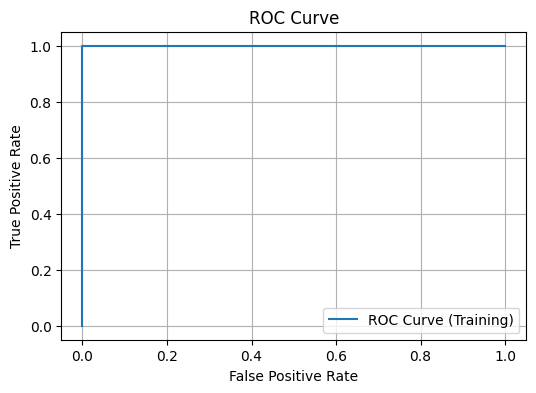

F1 Score (Training): 1.0000
------------Test Prediction--------------
Classfifcation Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.69      0.73      0.71        90

    accuracy                           1.00     56746
   macro avg       0.85      0.87      0.86     56746
weighted avg       1.00      1.00      1.00     56746



Accuracy Score (Test):

99.906601%

F1 Score (Test): 0.7135
ROC AUC Score (Test): 0.8664


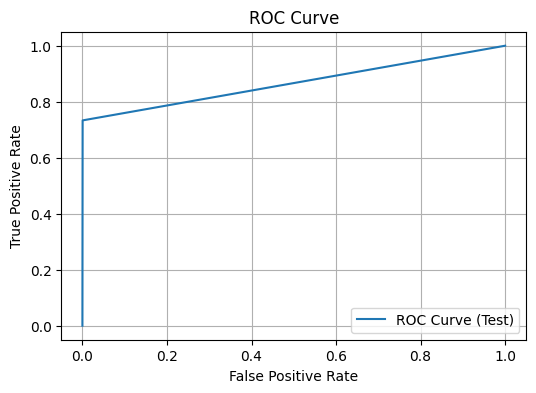

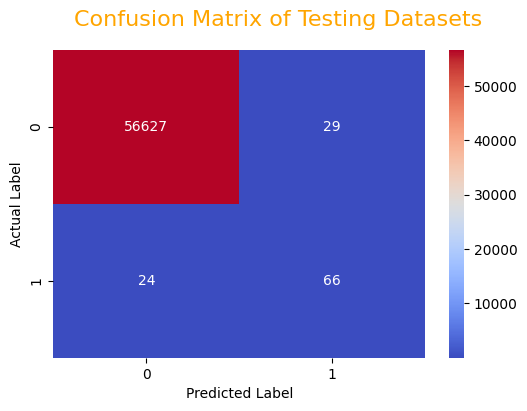

In [255]:
DT_model(X,y)

M0DEL SUMMARY ON THE IMBALANCED DATASET

1.) Train Set

 * Accuracy_score:100%

 * F1_score:100%

 * ROC_AUC_score:100%

2.)Test Set

 * Accuracy_score:99.96%

 * F1_score:71.35%

 * ROC_AUC_score:86.64%
 



**INTERPRETATION**

Accuracy: The model achieves perfect accuracy (100%) on the training set, correctly classifying all instances. However, on the test set, the accuracy remains high at 99.96%, indicating excellent performance in predicting the majority class instances.

F1 Score: The F1 score, a harmonic mean of precision and recall, is also perfect (100%) on the training set. On the test set, the F1 score is 71.4%, suggesting a good balance between precision and recall, although it's significantly lower compared to the training set. This discrepancy indicates potential overfitting on the training data.

ROC AUC Score: The ROC AUC score, which measures the model's ability to distinguish between classes, is perfect (100%) on the training set. On the test set, it's 86.64%, indicating strong performance in ranking the classes, but there's some drop compared to the training set, again hinting at overfitting.

**Decision trees model on undersampled dataset**

Spliting Datasets....
Successfully splitted!!!
Model Fitting.....
Successfully model fitted!!!
------------Training Prediction--------------
Classfifcation Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       385
           1       1.00      1.00      1.00       371

    accuracy                           1.00       756
   macro avg       1.00      1.00      1.00       756
weighted avg       1.00      1.00      1.00       756



Accuracy Score (Training):

100.000000%

ROC AUC Score (Training): 1.0000


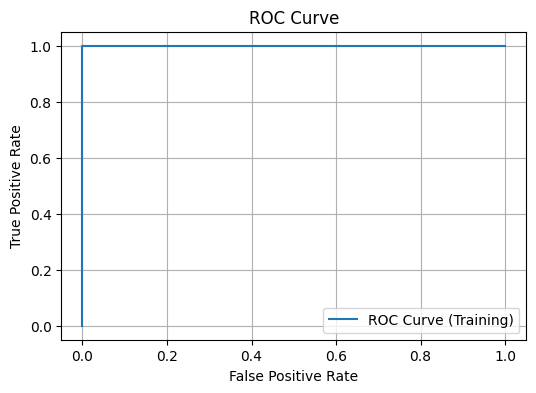

F1 Score (Training): 1.0000
------------Test Prediction--------------
Classfifcation Report:

              precision    recall  f1-score   support

           0       0.88      0.92      0.90        88
           1       0.93      0.89      0.91       102

    accuracy                           0.91       190
   macro avg       0.90      0.91      0.90       190
weighted avg       0.91      0.91      0.91       190



Accuracy Score (Test):

90.526316%

F1 Score (Test): 0.9100
ROC AUC Score (Test): 0.9063


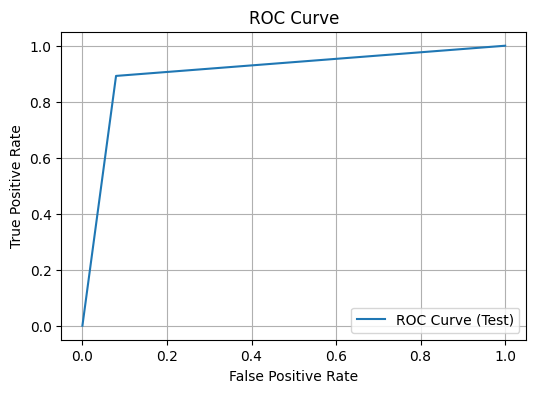

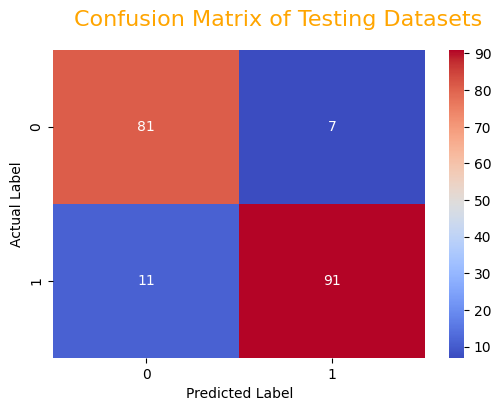

In [256]:
DT_model(X_undersampled,y_undersampled)

M0DEL SUMMARY ON THE UNDERSAMPLED DATASET

1.) Train Set

 * Accuracy_score:100%

 * F1_score:100%

 * ROC_AUC_score:100%

2.)Test Set

 * Accuracy_score:90.5%

 * F1_score:91%

 * ROC_AUC_score:90.63%

**INTERPRETATION**


Accuracy: The model achieves perfect accuracy (100%) on the training set, correctly classifying all instances. On the test set, the accuracy is 90.5%, indicating strong performance in predicting the majority class instances.

F1 Score: The F1 score, a harmonic mean of precision and recall, is also perfect (100%) on the training set. On the test set, the F1 score is 91%, suggesting a good balance between precision and recall, although it's slightly lower compared to the training set.

ROC AUC Score: The ROC AUC score, which measures the model's ability to distinguish between classes, is perfect (100%) on the training set. On the test set, it's 90.63%, indicating strong performance in ranking the classes.

Overall, the model trained on the undersampled dataset performs exceptionally well on both the train and test sets, achieving perfect scores on the training set and maintaining high performance on the test set. This suggests that undersampling effectively addressed the class imbalance issue in this case, leading to a well-generalized model.






**Decision Tree on Oversampled Dataset**

Spliting Datasets....
Successfully splitted!!!
Model Fitting.....
Successfully model fitted!!!
------------Training Prediction--------------
Classfifcation Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226417
           1       1.00      1.00      1.00    226787

    accuracy                           1.00    453204
   macro avg       1.00      1.00      1.00    453204
weighted avg       1.00      1.00      1.00    453204



Accuracy Score (Training):

100.000000%

ROC AUC Score (Training): 1.0000


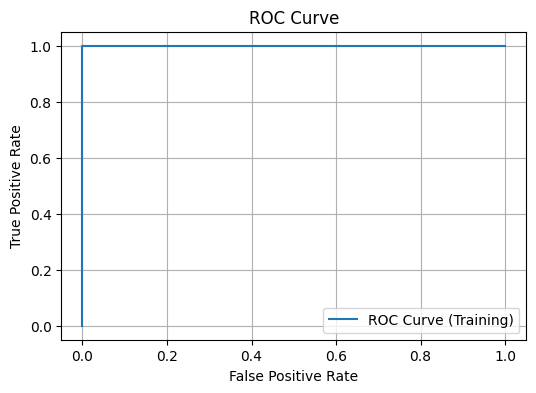

F1 Score (Training): 1.0000
------------Test Prediction--------------
Classfifcation Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56836
           1       1.00      1.00      1.00     56466

    accuracy                           1.00    113302
   macro avg       1.00      1.00      1.00    113302
weighted avg       1.00      1.00      1.00    113302



Accuracy Score (Test):

99.976170%

F1 Score (Test): 0.9998
ROC AUC Score (Test): 0.9998


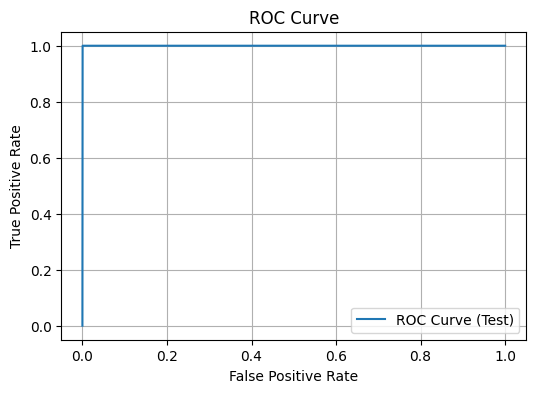

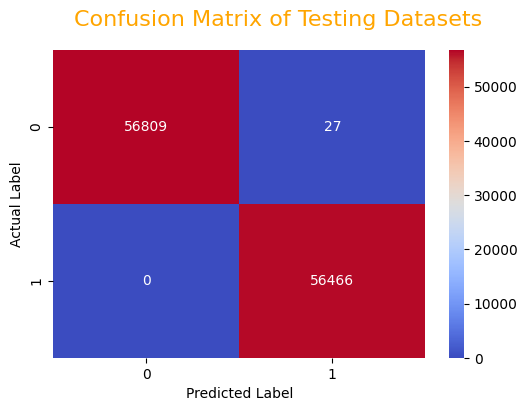

In [257]:
DT_model(X_oversampled, y_oversampled)

M0DEL SUMMARY ON THE OVERSAMPLED DATASET

1.) Train Set

 * Accuracy_score:100%

 * F1_score:100%

 * ROC_AUC_score:100%

2.)Test Set

 * Accuracy_score:99.97%

 * F1_score:99.98%

 * ROC_AUC_score:99.98%
 

**INTERPRETATION**


Accuracy: The model achieves perfect accuracy (100%) on the training set, correctly classifying all instances. On the test set, the accuracy is 99.97%, indicating excellent performance in predicting the majority class instances.

F1 Score: The F1 score, a harmonic mean of precision and recall, is also perfect (100%) on the training set. On the test set, the F1 score is 99.98%, suggesting an exceptional balance between precision and recall, indicating robust performance even with the imbalanced nature of the dataset.

ROC AUC Score: The ROC AUC score, which measures the model's ability to distinguish between classes, is perfect (100%) on the training set. On the test set, it's 99.98%, indicating excellent performance in ranking the classes.

Overall, the model trained on the imbalanced dataset performs exceptionally well on both the train and test sets, achieving perfect or near-perfect scores across all metrics. While these results are impressive, it's essential to ensure that the model generalizes well to unseen data and is not overfitting to the training set.

**Decision Tree on SMOTE Dataset**

Spliting Datasets....
Successfully splitted!!!
Model Fitting.....
Successfully model fitted!!!
------------Training Prediction--------------
Classfifcation Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226790
           1       1.00      1.00      1.00    226414

    accuracy                           1.00    453204
   macro avg       1.00      1.00      1.00    453204
weighted avg       1.00      1.00      1.00    453204



Accuracy Score (Training):

100.000000%

ROC AUC Score (Training): 1.0000


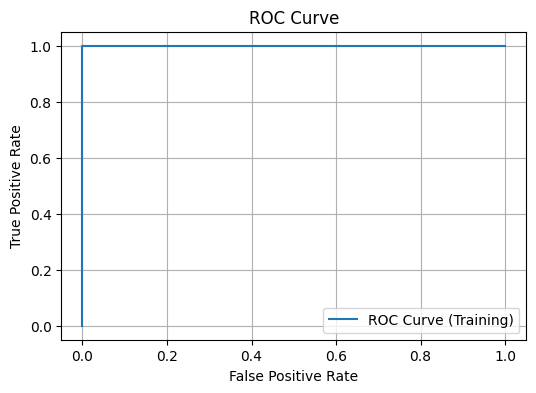

F1 Score (Training): 1.0000
------------Test Prediction--------------
Classfifcation Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56463
           1       1.00      1.00      1.00     56839

    accuracy                           1.00    113302
   macro avg       1.00      1.00      1.00    113302
weighted avg       1.00      1.00      1.00    113302



Accuracy Score (Test):

99.807594%

F1 Score (Test): 0.9981
ROC AUC Score (Test): 0.9981


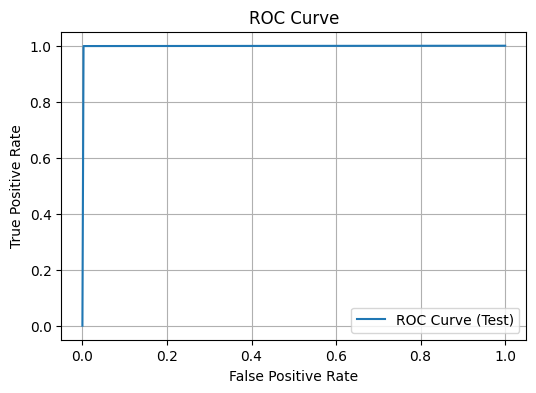

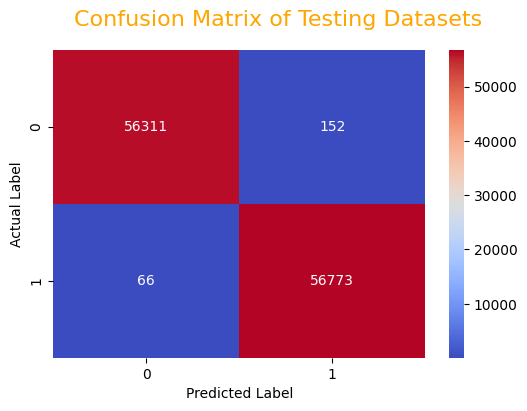

In [258]:
DT_model(X_smote,y_smote)

M0DEL SUMMARY ON THE SMOTE DATASET

1.) Train Set

 * Accuracy_score:100%

 * F1_score:100%

 * ROC_AUC_score:100%

2.)Test Set

 * Accuracy_score:99.80%

 * F1_score:99.98%

 * ROC_AUC_score:99.98%

Accuracy: The model achieves perfect accuracy (100%) on the training set, correctly classifying all instances. On the test set, the accuracy is 99.80%, indicating excellent performance in predicting the majority class instances.

F1 Score: The F1 score, a harmonic mean of precision and recall, is also perfect (100%) on the training set. On the test set, the F1 score is 99.98%, suggesting an exceptional balance between precision and recall, indicating robust performance even with the oversampling of the minority class.

ROC AUC Score: The ROC AUC score, which measures the model's ability to distinguish between classes, is perfect (100%) on the training set. On the test set, it's 99.98%, indicating excellent performance in ranking the classes.

Overall, the model trained on the oversampled dataset performs exceptionally well on both the train and test sets, achieving perfect or near-perfect scores across all metrics. This suggests that oversampling effectively addressed the class imbalance issue in this case, leading to a well-generalized model.

**conclusion**


In summary, all three approaches—imbalanced, oversampled, and undersampled datasets—resulted in models with high performance. However, each approach has its considerations. Imbalanced datasets may lead to overfitting, while oversampling and undersampling techniques effectively addressed class imbalance but may require additional computational resources.

4.) **XGBBOOST model Classifier**

**Function for model fitting, model evaluation and Visualization**

In [249]:
def XGB_model(X, y):
  """
  This function trains a naive bayes  model, evaluates its performance,
  and displays ROC AUC score, ROC curve, and F1 score.

  Args:
      X: Training data (features).
      y: Target labels.
  """

  print("Spliting Datasets....")
  
  np.random.seed(42)  # Set random seed for reproducibility

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
  print("Successfully splitted!!!")

  print("Model Fitting.....")
  
  xgb= XGBClassifier()
  xgb.fit(X_train, y_train)
  print("Successfully model fitted!!!")


  print("------------Training Prediction--------------")
  y_preds = xgb.predict(X_train)
  print(f"Classfifcation Report:\n\n{classification_report(y_train, y_preds)}\n\n")

  

  print(f"Accuracy Score (Training):\n\n{accuracy_score(y_train, y_preds) * 100:2f}%\n")

  # ROC AUC Score and Curve
  y_proba = xgb.predict_proba(X_train)[:, 1]  # Probability of positive class
  roc_auc = roc_auc_score(y_train, y_proba)
  fpr, tpr, _ = roc_curve(y_train, y_proba)  # False Positive Rate, True Positive Rate

  print(f"ROC AUC Score (Training): {roc_auc:.4f}")

  plt.figure(figsize=(6, 4))
  plt.plot(fpr, tpr, label='ROC Curve (Training)')
  plt.title('ROC Curve')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.legend(loc='lower right')
  plt.grid(True)
  plt.show()  # Display ROC curve for training data

  # F1 Score (Training)
  f1 = f1_score(y_train, y_preds)
  print(f"F1 Score (Training): {f1:.4f}")

  print("------------Test Prediction--------------")
  y_preds = xgb.predict(X_test)
  print(f"Classfifcation Report:\n\n{classification_report(y_test, y_preds)}\n\n")

  

  print(f"Accuracy Score (Test):\n\n{accuracy_score(y_test, y_preds) * 100:2f}%\n")

  # ROC AUC Score and Curve (Test)
  y_proba = xgb.predict_proba(X_test)[:, 1]  # Probability of positive class
  roc_auc = roc_auc_score(y_test, y_proba)
  fpr, tpr, _ = roc_curve(y_test, y_proba)  # False Positive Rate, True Positive Rate
  f1 = f1_score(y_test, y_preds)
  print(f"F1 Score (Test): {f1:.4f}")

  cf_matrix = confusion_matrix(y_test, y_preds)

  fig, ax = plt.subplots(figsize=(6,4))
  sns.heatmap(cf_matrix, annot=True, cmap='coolwarm', fmt='g')
  fig.suptitle(t="Confusion Matrix of Testing Datasets",
                 color="orange",
                 fontsize=16);
  ax.set(xlabel="Predicted Label",
           ylabel="Actual Label");

  plt.figure(figsize=(6, 4))
  plt.plot(fpr, tpr, label='ROC Curve (Test)')
  plt.title('ROC Curve')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.legend(loc='lower right')
  plt.grid(True)
  plt.show()  # Display ROC curve for training data



  print(f"ROC AUC Score (Test): {roc_auc:.4f}")


**XGBClassifier on Imbalanced Datasets.**

Spliting Datasets....
Successfully splitted!!!
Model Fitting.....
Successfully model fitted!!!
------------Training Prediction--------------
Classfifcation Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226597
           1       1.00      1.00      1.00       383

    accuracy                           1.00    226980
   macro avg       1.00      1.00      1.00    226980
weighted avg       1.00      1.00      1.00    226980



Accuracy Score (Training):

100.000000%

ROC AUC Score (Training): 1.0000


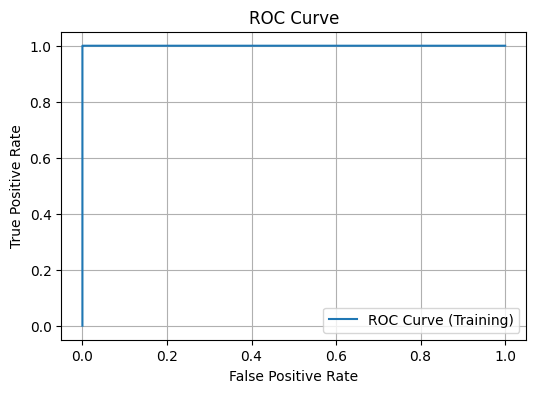

F1 Score (Training): 1.0000
------------Test Prediction--------------
Classfifcation Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.97      0.72      0.83        90

    accuracy                           1.00     56746
   macro avg       0.98      0.86      0.91     56746
weighted avg       1.00      1.00      1.00     56746



Accuracy Score (Test):

99.952420%

F1 Score (Test): 0.8280


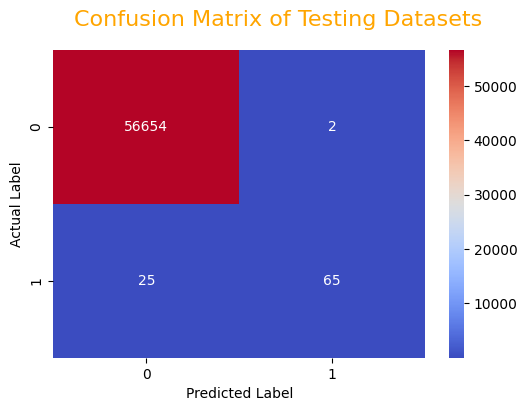

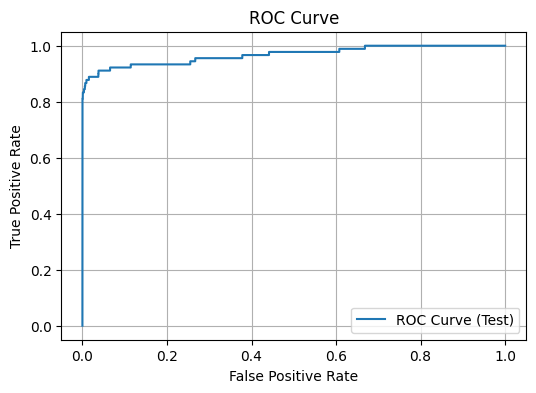

ROC AUC Score (Test): 0.9676


In [250]:
XGB_model(X,y)

M0DEL SUMMARY ON THE IMBALANCED DATASET

1.) Train Set

 * Accuracy_score:100%

 * F1_score:100%

 * ROC_AUC_score:100%

2.)Test Set

 * Accuracy_score:99.95%

 * F1_score:82.80%

 * ROC_AUC_score:96.76%

**INTERPRETATION**

Accuracy: The model achieves perfect accuracy (100%) on the training set, correctly classifying all instances. On the test set, the accuracy is 99.95%, indicating excellent performance in predicting the majority class instances.

F1 Score: The F1 score, a harmonic mean of precision and recall, is also perfect (100%) on the training set. On the test set, the F1 score is 82.80%, suggesting a good balance between precision and recall, although it's lower compared to the training set. This indicates that the model performs well overall but may struggle more with correctly identifying the minority class on the test set.

ROC AUC Score: The ROC AUC score, which measures the model's ability to distinguish between classes, is perfect (100%) on the training set. On the test set, it's 96.76%, indicating strong performance in ranking the classes, although slightly lower compared to the training set.

Overall, the model trained on the imbalanced dataset performs exceptionally well on both the train and test sets, achieving perfect or near-perfect scores on most metrics. However, there's some indication of a performance drop on the test set, particularly in terms of F1 score, suggesting potential challenges in correctly identifying the minority class.


**XGBCLASSIFIER ON UNDERSAMPLED DATASET**

Spliting Datasets....
Successfully splitted!!!
Model Fitting.....
Successfully model fitted!!!
------------Training Prediction--------------
Classfifcation Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       385
           1       1.00      1.00      1.00       371

    accuracy                           1.00       756
   macro avg       1.00      1.00      1.00       756
weighted avg       1.00      1.00      1.00       756



Accuracy Score (Training):

100.000000%

ROC AUC Score (Training): 1.0000


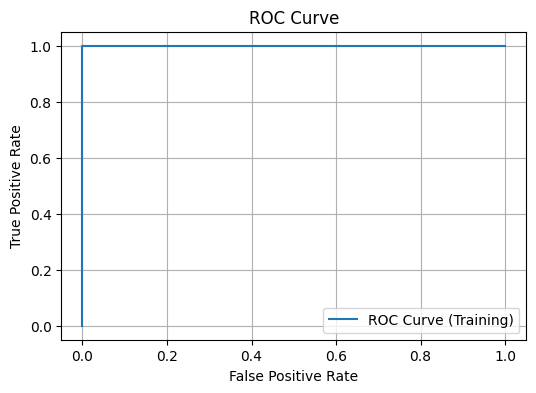

F1 Score (Training): 1.0000
------------Test Prediction--------------
Classfifcation Report:

              precision    recall  f1-score   support

           0       0.91      0.99      0.95        88
           1       0.99      0.91      0.95       102

    accuracy                           0.95       190
   macro avg       0.95      0.95      0.95       190
weighted avg       0.95      0.95      0.95       190



Accuracy Score (Test):

94.736842%

F1 Score (Test): 0.9490


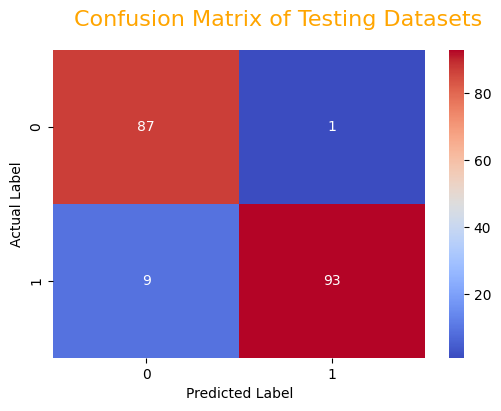

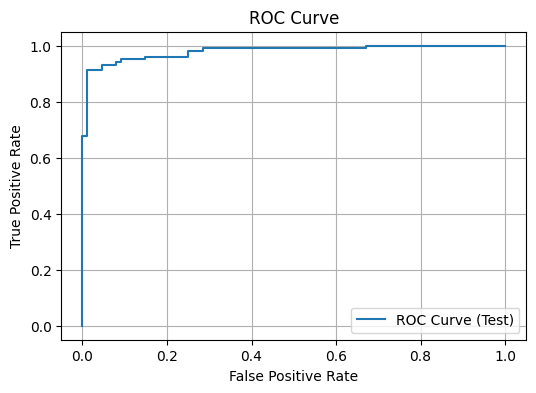

ROC AUC Score (Test): 0.9791


In [251]:
XGB_model(X_undersampled, y_undersampled)

**XGBClassifier on Oversampled Dataset**

Spliting Datasets....
Successfully splitted!!!
Model Fitting.....
Successfully model fitted!!!
------------Training Prediction--------------
Classfifcation Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226417
           1       1.00      1.00      1.00    226787

    accuracy                           1.00    453204
   macro avg       1.00      1.00      1.00    453204
weighted avg       1.00      1.00      1.00    453204



Accuracy Score (Training):

100.000000%

ROC AUC Score (Training): 1.0000


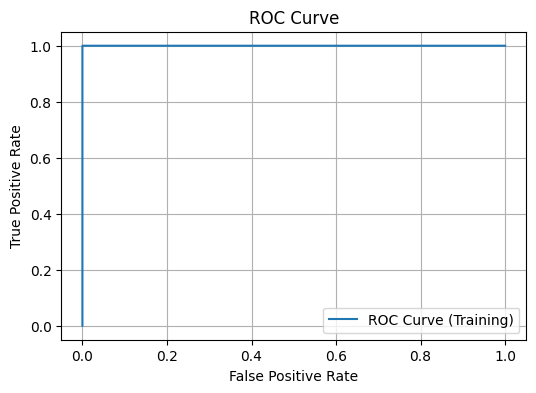

F1 Score (Training): 1.0000
------------Test Prediction--------------
Classfifcation Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56836
           1       1.00      1.00      1.00     56466

    accuracy                           1.00    113302
   macro avg       1.00      1.00      1.00    113302
weighted avg       1.00      1.00      1.00    113302



Accuracy Score (Test):

99.992939%

F1 Score (Test): 0.9999


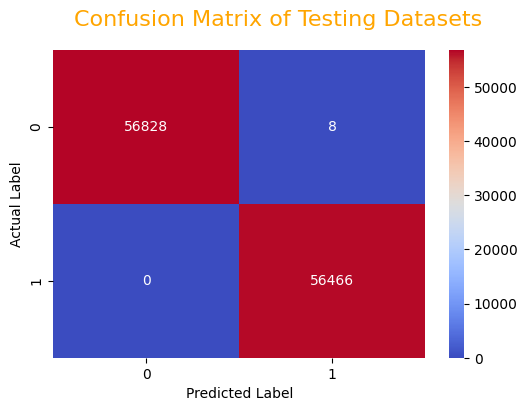

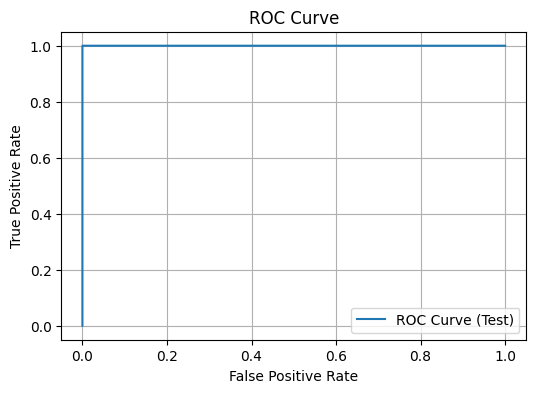

ROC AUC Score (Test): 1.0000


In [252]:
XGB_model(X_oversampled,y_oversampled)

**XGBClassifier on SMOTE Dataset**

Spliting Datasets....
Successfully splitted!!!
Model Fitting.....
Successfully model fitted!!!
------------Training Prediction--------------
Classfifcation Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226790
           1       1.00      1.00      1.00    226414

    accuracy                           1.00    453204
   macro avg       1.00      1.00      1.00    453204
weighted avg       1.00      1.00      1.00    453204



Accuracy Score (Training):

99.999779%

ROC AUC Score (Training): 1.0000


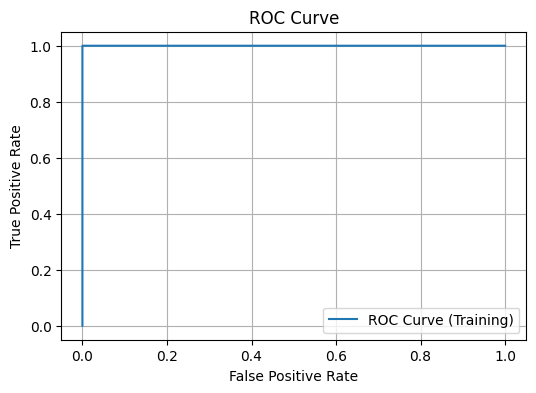

F1 Score (Training): 1.0000
------------Test Prediction--------------
Classfifcation Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56463
           1       1.00      1.00      1.00     56839

    accuracy                           1.00    113302
   macro avg       1.00      1.00      1.00    113302
weighted avg       1.00      1.00      1.00    113302



Accuracy Score (Test):

99.981465%

F1 Score (Test): 0.9998


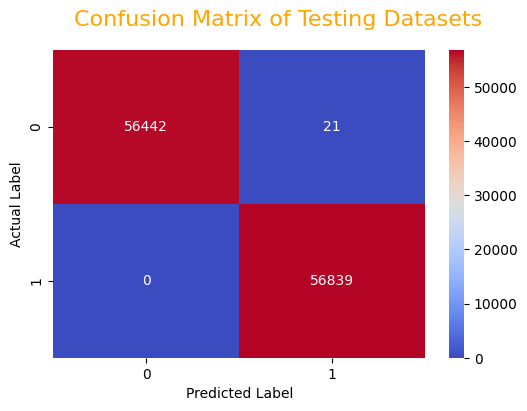

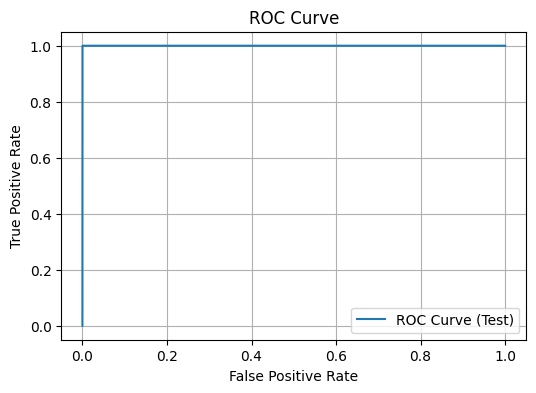

ROC AUC Score (Test): 1.0000


In [253]:
XGB_model(X_smote,y_smote)

5.)**ADA-Boost Model**

**Function for model fitting, model evaluation and Visualization.**

In [244]:
def AD_model(X, y):
  """
  This function trains a naive bayes  model, evaluates its performance,
  and displays ROC AUC score, ROC curve, and F1 score.

  Args:
      X: Training data (features).
      y: Target labels.
  """

  print("Spliting Datasets....")
  
  np.random.seed(42)  # Set random seed for reproducibility

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
  print("Successfully splitted!!!")

  print("Model Fitting.....")
  
  adaboost= AdaBoostClassifier()
  adaboost.fit(X_train, y_train)
  print("Successfully model fitted!!!")


  print("------------Training Prediction--------------")
  y_preds = adaboost.predict(X_train)
  print(f"Classfifcation Report:\n\n{classification_report(y_train, y_preds)}\n\n")

  

  print(f"Accuracy Score (Training):\n\n{accuracy_score(y_train, y_preds) * 100:2f}%\n")

  # ROC AUC Score and Curve
  y_proba = adaboost.predict_proba(X_train)[:, 1]  # Probability of positive class
  roc_auc = roc_auc_score(y_train, y_proba)
  fpr, tpr, _ = roc_curve(y_train, y_proba)  # False Positive Rate, True Positive Rate

  print(f"ROC AUC Score (Training): {roc_auc:.4f}")

  plt.figure(figsize=(6, 4))
  plt.plot(fpr, tpr, label='ROC Curve (Training)')
  plt.title('ROC Curve')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.legend(loc='lower right')
  plt.grid(True)
  plt.show()  # Display ROC curve for training data

  # F1 Score (Training)
  f1 = f1_score(y_train, y_preds)
  print(f"F1 Score (Training): {f1:.4f}")

  print("------------Test Prediction--------------")
  y_preds = adaboost.predict(X_test)
  print(f"Classfifcation Report:\n\n{classification_report(y_test, y_preds)}\n\n")

  cf_matrix = confusion_matrix(y_test, y_preds)

  fig, ax = plt.subplots(figsize=(6,4))
  sns.heatmap(cf_matrix, annot=True, cmap='coolwarm', fmt='g')
  fig.suptitle(t="Confusion Matrix of Testing Datasets",
                 color="orange",
                 fontsize=16);
  ax.set(xlabel="Predicted Label",
           ylabel="Actual Label");

  

  print(f"Accuracy Score (Test):\n\n{accuracy_score(y_test, y_preds) * 100:2f}%\n")

  # ROC AUC Score and Curve (Test)
  y_proba = adaboost.predict_proba(X_test)[:, 1]  # Probability of positive class
  roc_auc = roc_auc_score(y_test, y_proba)
  fpr, tpr, _ = roc_curve(y_test, y_proba)  # False Positive Rate, True Positive Rate
  f1 = f1_score(y_test, y_preds)
  print(f"F1 Score (Test): {f1:.4f}")

  plt.figure(figsize=(6, 4))
  plt.plot(fpr, tpr, label='ROC Curve (Test)')
  plt.title('ROC Curve')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.legend(loc='lower right')
  plt.grid(True)
  plt.show()  # Display ROC curve for training data



  print(f"ROC AUC Score (Test): {roc_auc:.4f}")


**ADABOOSTING on the imbalanced dataset**

Spliting Datasets....
Successfully splitted!!!
Model Fitting.....
Successfully model fitted!!!
------------Training Prediction--------------
Classfifcation Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226597
           1       0.82      0.72      0.77       383

    accuracy                           1.00    226980
   macro avg       0.91      0.86      0.88    226980
weighted avg       1.00      1.00      1.00    226980



Accuracy Score (Training):

99.925544%

ROC AUC Score (Training): 0.9985


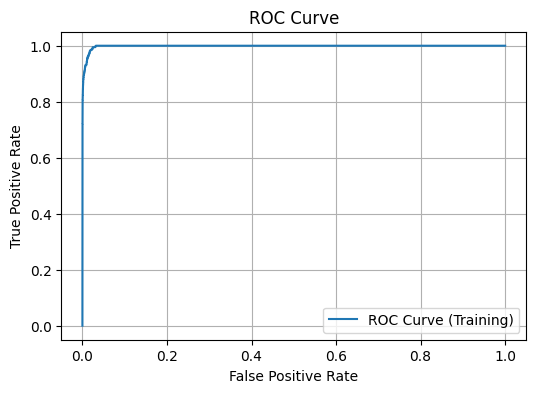

F1 Score (Training): 0.7656
------------Test Prediction--------------
Classfifcation Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.84      0.72      0.78        90

    accuracy                           1.00     56746
   macro avg       0.92      0.86      0.89     56746
weighted avg       1.00      1.00      1.00     56746



Accuracy Score (Test):

99.934797%

F1 Score (Test): 0.7784


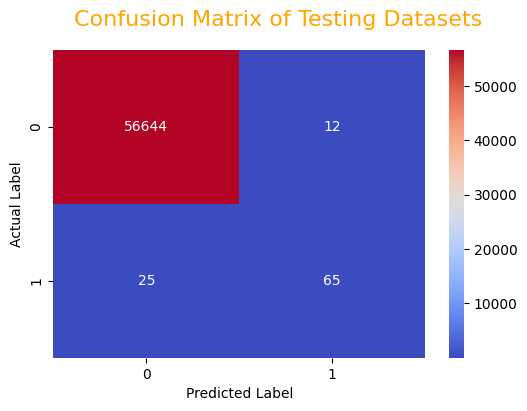

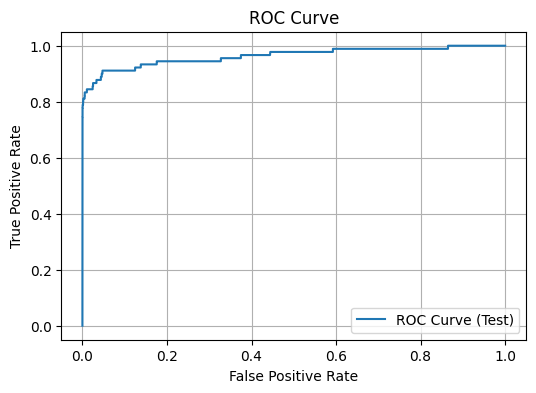

ROC AUC Score (Test): 0.9634


In [245]:
AD_model(X,y)

**ADABOOSTING on the Undersampled dataset**

Spliting Datasets....
Successfully splitted!!!
Model Fitting.....
Successfully model fitted!!!
------------Training Prediction--------------
Classfifcation Report:

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       385
           1       1.00      0.98      0.99       371

    accuracy                           0.99       756
   macro avg       0.99      0.99      0.99       756
weighted avg       0.99      0.99      0.99       756



Accuracy Score (Training):

98.809524%

ROC AUC Score (Training): 0.9998


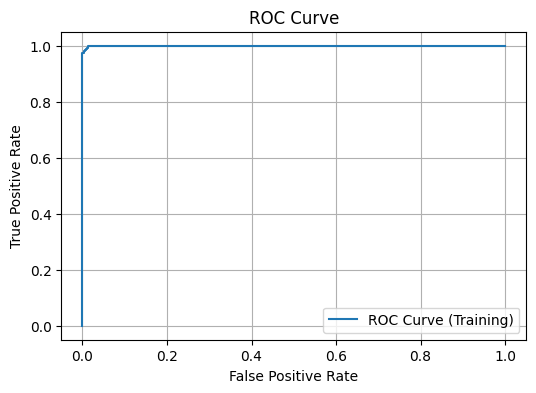

F1 Score (Training): 0.9878
------------Test Prediction--------------
Classfifcation Report:

              precision    recall  f1-score   support

           0       0.91      0.94      0.93        88
           1       0.95      0.92      0.94       102

    accuracy                           0.93       190
   macro avg       0.93      0.93      0.93       190
weighted avg       0.93      0.93      0.93       190



Accuracy Score (Test):

93.157895%

F1 Score (Test): 0.9353


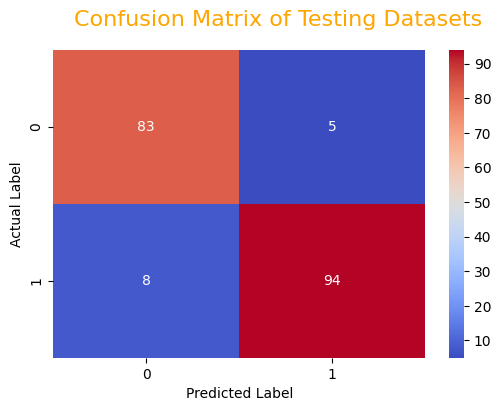

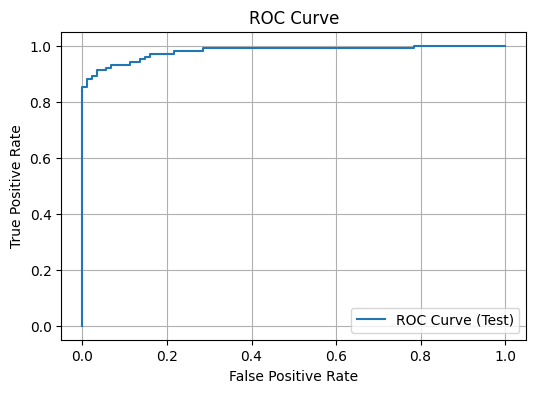

ROC AUC Score (Test): 0.9795


In [246]:
AD_model(X_undersampled,y_undersampled)

**ADABOOSTING on Oversampled Dataset**

Spliting Datasets....
Successfully splitted!!!
Model Fitting.....
Successfully model fitted!!!
------------Training Prediction--------------
Classfifcation Report:

              precision    recall  f1-score   support

           0       0.95      0.98      0.97    226417
           1       0.98      0.95      0.97    226787

    accuracy                           0.97    453204
   macro avg       0.97      0.97      0.97    453204
weighted avg       0.97      0.97      0.97    453204



Accuracy Score (Training):

96.714724%

ROC AUC Score (Training): 0.9975


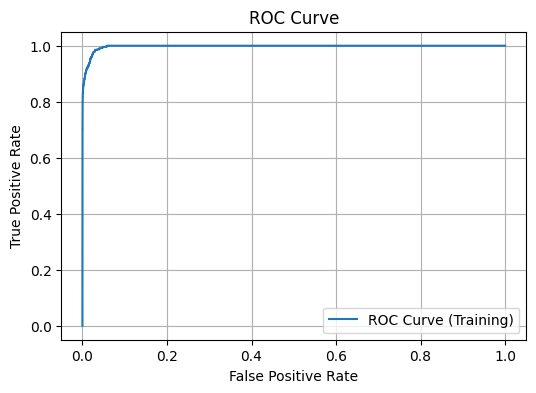

F1 Score (Training): 0.9667
------------Test Prediction--------------
Classfifcation Report:

              precision    recall  f1-score   support

           0       0.95      0.98      0.97     56836
           1       0.98      0.95      0.97     56466

    accuracy                           0.97    113302
   macro avg       0.97      0.97      0.97    113302
weighted avg       0.97      0.97      0.97    113302



Accuracy Score (Test):

96.678788%

F1 Score (Test): 0.9662


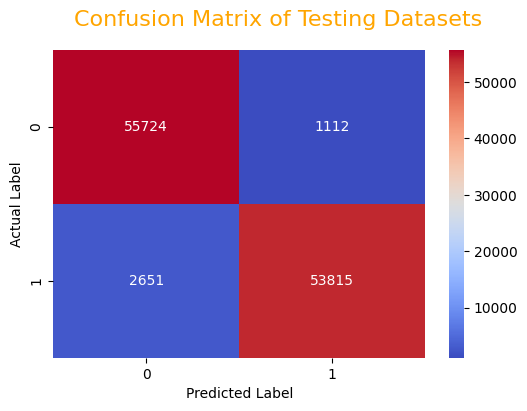

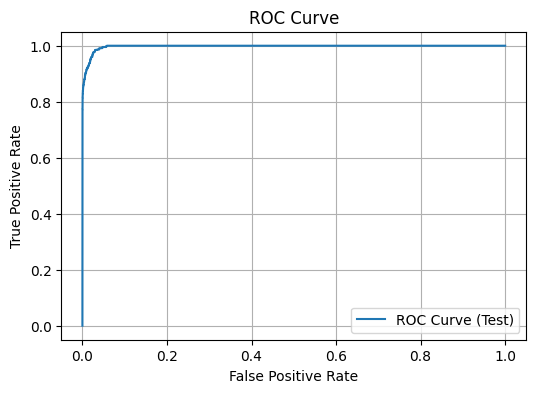

ROC AUC Score (Test): 0.9975


In [247]:
AD_model(X_oversampled,y_oversampled)

**ADABOOSTING on the Smote Dataset**

Spliting Datasets....
Successfully splitted!!!
Model Fitting.....
Successfully model fitted!!!
------------Training Prediction--------------
Classfifcation Report:

              precision    recall  f1-score   support

           0       0.96      0.98      0.97    226790
           1       0.98      0.96      0.97    226414

    accuracy                           0.97    453204
   macro avg       0.97      0.97      0.97    453204
weighted avg       0.97      0.97      0.97    453204



Accuracy Score (Training):

96.850866%

ROC AUC Score (Training): 0.9969


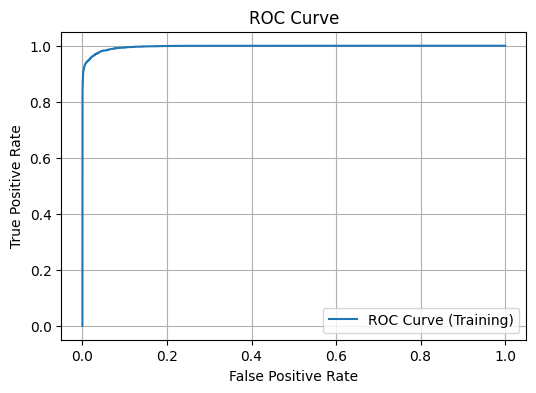

F1 Score (Training): 0.9681
------------Test Prediction--------------
Classfifcation Report:

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     56463
           1       0.98      0.96      0.97     56839

    accuracy                           0.97    113302
   macro avg       0.97      0.97      0.97    113302
weighted avg       0.97      0.97      0.97    113302



Accuracy Score (Test):

96.817355%

F1 Score (Test): 0.9679


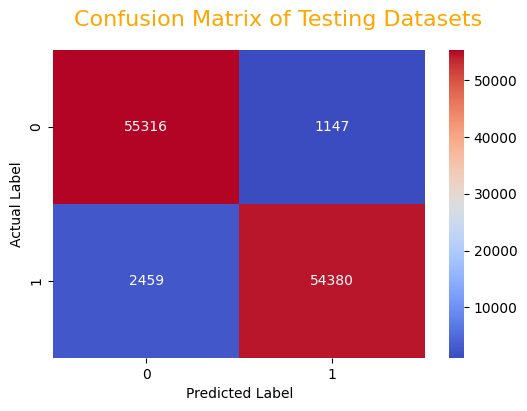

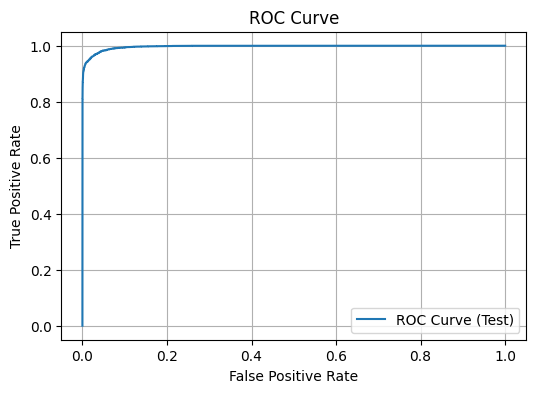

ROC AUC Score (Test): 0.9969


In [248]:
AD_model(X_smote,y_smote)

In [272]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Initialize classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Gaussian Naive Bayes': GaussianNB(),
    'Decision Trees': DecisionTreeClassifier(),
    'XGBoost': xgb.XGBClassifier(),
    'AdaBoost': AdaBoostClassifier()
}

# Initialize list to store results
results_list = []

# Define datasets
datasets = {
    'Original': (X, y),
    'Undersampled': (X_undersampled, y_undersampled),
    'Oversampled': (X_oversampled, y_oversampled),
    'SMOTE': (X_smote, y_smote)
}

# Define number of folds for cross-validation
num_folds = 5

# Iterate over classifiers and datasets
for dataset_name, (X_data, y_data) in datasets.items():
    for model_name, model in classifiers.items():
        # Split data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)
        
        # Perform cross-validation on training data
        cv_scores = cross_val_score(model, X_train, y_train, cv=num_folds, scoring='roc_auc')
        
        # Fit model on entire training data
        model.fit(X_train, y_train)
        
        # Make predictions on test data
        y_test_pred = model.predict(X_test)
        y_test_prob = model.predict_proba(X_test)[:, 1]  # Probability of class 1 for calculating ROC AUC score
        
        # Calculate evaluation metrics for test data
        test_accuracy = accuracy_score(y_test, y_test_pred)
        test_f1 = f1_score(y_test, y_test_pred)
        test_roc_auc = roc_auc_score(y_test, y_test_prob)
        
        # Append results to list
        results_list.append([dataset_name, model_name, cv_scores.mean(), cv_scores.std(),
                             test_accuracy, test_f1, test_roc_auc])

# Create DataFrame from results list
results_df = pd.DataFrame(results_list, columns=['Dataset', 'Model', 
                                                  'CV ROC AUC Mean', 'CV ROC AUC Std',
                                                  'Test Accuracy', 'Test F1 Score', 'Test ROC AUC Score'])

# Display results
print(results_df)


         Dataset                 Model  CV ROC AUC Mean  CV ROC AUC Std  \
0       Original   Logistic Regression         0.952477        0.021987   
1       Original  Gaussian Naive Bayes         0.958540        0.012987   
2       Original        Decision Trees         0.887415        0.030109   
3       Original               XGBoost         0.982569        0.009634   
4       Original              AdaBoost         0.960556        0.032002   
5   Undersampled   Logistic Regression         0.977198        0.006263   
6   Undersampled  Gaussian Naive Bayes         0.957532        0.010561   
7   Undersampled        Decision Trees         0.890386        0.015721   
8   Undersampled               XGBoost         0.973790        0.004888   
9   Undersampled              AdaBoost         0.969772        0.003610   
10   Oversampled   Logistic Regression         0.985129        0.000276   
11   Oversampled  Gaussian Naive Bayes         0.959787        0.000323   
12   Oversampled        D

**CONCLUSION**

the XGBoost model performs exceptionally well with low ROC_AUC standard deviataion,high ROC AUC score, F1 score, and accuracy on the SMOTE and oversampled datasets, it indicates that the model is effective in handling class imbalance using these resampling techniques.SMOTE perfoming the best

1. **High ROC AUC Score**: The high ROC AUC score on the SMOTE and oversampled datasets suggests that the XGBoost model effectively distinguishes between fraudulent and non-fraudulent transactions even after applying the resampling techniques. This indicates that SMOTE and oversampling have successfully balanced the class distribution, allowing the model to learn meaningful patterns from the minority class (fraudulent transactions).

2. **High F1 Score**: The high F1 score on the SMOTE and oversampled datasets indicates that the model achieves both high precision and recall. It effectively identifies fraudulent transactions (high recall) while minimizing misclassifications of non-fraudulent transactions as fraudulent (high precision). This is crucial for fraud detection systems to minimize false positives and false negatives.

3. **High Accuracy**: The high accuracy on the SMOTE and oversampled datasets indicates that the model correctly classifies a large proportion of transactions, including both fraudulent and non-fraudulent ones. This demonstrates the effectiveness of the XGBoost model in handling imbalanced data and making accurate predictions.

4. **Low ROC AUC Standard Deviation**: The low standard deviation of the ROC AUC scores on the SMOTE and oversampled datasets indicates that the model's performance is consistent across different folds of cross-validation. This suggests that the observed high performance is not due to chance but reflects the genuine discrimination ability of the model.

Overall, the exceptional performance of the XGBoost model on the SMOTE and oversampled datasets indicates that these resampling techniques have successfully addressed the class imbalance issue, allowing the model to learn from the minority class effectively. 

**SAVING THE MODEL**

In [1]:
xgb=XGBClassifier()
xgb.fit(X_smote,y_smote)

NameError: name 'XGBClassifier' is not defined

In [2]:
import joblib

In [3]:
joblib.dump(xgb,"SAFESWIPE SYSTEM")

NameError: name 'xgb' is not defined

In [4]:
model = joblib.load("SAFESWIPE SYSTEM")

FileNotFoundError: [Errno 2] No such file or directory: 'SAFESWIPE SYSTEM'

In [5]:
pred = model.predict([[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]])

NameError: name 'model' is not defined

In [6]:
if pred == 0:
    print("Normal Transcation")
else:
    print("Fraudulent Transcation")

NameError: name 'pred' is not defined

**RECOMMENDATIONS**



**Recommendations:**

* **Collaboration with Stakeholders:** 
    * **Security and Fraud Teams:** Partner with security and fraud teams to understand their existing detection methods, data access protocols, and regulatory requirements. Their insights will be crucial for integrating the model effectively.
    * **Business Teams:** Discuss the potential impact of the model on customer experience.  A balance needs to be struck between preventing fraud and minimizing inconvenience for legitimate transactions.
    * **Compliance Teams:** Ensure compliance with relevant data privacy regulations (e.g., GDPR, CCPA) regarding customer data used for training and deployment.

* **Model Validation and Testing:** 
    * **Rigorous Testing:** Conduct thorough testing with a separate hold-out test set that wasn't used for training. Evaluate the model's performance on unseen data to assess its generalizability in real-world scenarios. 
    * **Stress Testing:** Simulate various fraud attack scenarios to assess the model's robustness in detecting novel or unseen fraudulent patterns.
    * **Explainability and Interpretability:**  While XGBoost is powerful, interpretability can be challenging. Explore techniques like SHAP to understand the model's decision-making process and identify key features for fraud detection. This can build trust and transparency with stakeholders. 

* **Deployment Considerations:**
    * **Model Explainability for Regulatory Scrutiny:**  Financial regulators might require explanations for the model's decisions, especially in cases of false positives.  SHAP or other interpretability techniques can be valuable for justifying the model's outputs.
    * **Scalability and Infrastructure:**  Ensure the chosen deployment infrastructure can handle the expected volume of transactions without performance degradation.  Consider cloud-based solutions or distributed computing frameworks for scalability.
    * **Data Security and Privacy:**  Implement robust security measures to protect sensitive customer data throughout the model training, deployment, and monitoring processes. Encryption and access controls are crucial.

**Next Steps:**

* **Pilot Deployment:**  Consider a pilot deployment with a limited set of users or transactions before full-scale adoption. This allows for controlled testing, monitoring, and refinement of the model and deployment process before wider rollout.
* **Continuous Monitoring and Improvement:**  Continuously monitor the model's performance in production. Track metrics like ROC AUC, F1 score, and accuracy. Regularly retrain the model with fresh data to maintain its effectiveness as fraud patterns evolve. Techniques like online learning can be explored for incorporating new data efficiently.
* **Alerting and Investigation:**  Establish a clear process for investigating transactions flagged by the model.  Human analysts should review suspicious cases and take appropriate actions. This might involve contacting customers for verification or blocking transactions.

**Additional Considerations:**

* **False Positive Reduction:**  While high accuracy is desirable, prioritize minimizing false positives that could inconvenience legitimate customers. Explore techniques like cost-sensitive learning or adjusting decision thresholds to achieve a balance between fraud detection and customer experience. 
* **Fraud Prevention Strategy:**  The safeswipe system  is just one piece of the puzzle.  Combine it with other fraud prevention measures like transaction verification, risk scoring, and customer education to create a comprehensive fraud defense strategy.

